In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the data
data = pd.read_csv("Data_Entry_2017.csv")
data.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  
3                        0.171  0.171          NaN  
4                        0.143  0.143          NaN

In [4]:
print('shape of data : ',data.shape)

shape of data :  (112120, 12)


In [5]:
data.describe()

Follow-up #     Patient ID    Patient Age  OriginalImage[Width  \
count  112120.000000  112120.000000  112120.000000        112120.000000   
mean        8.573751   14346.381743      46.901463          2646.078844   
std        15.406320    8403.876972      16.839923           341.246429   
min         0.000000       1.000000       1.000000          1143.000000   
25%         0.000000    7310.750000      35.000000          2500.000000   
50%         3.000000   13993.000000      49.000000          2518.000000   
75%        10.000000   20673.000000      59.000000          2992.000000   
max       183.000000   30805.000000     414.000000          3827.000000   

             Height]  OriginalImagePixelSpacing[x             y]  Unnamed: 11  
count  112120.000000                112120.000000  112120.000000          0.0  
mean     2486.438842                     0.155649       0.155649          NaN  
std       401.268227                     0.016174       0.016174          NaN  
min       966.000000                     0.115000       0.115000          NaN  
25%      2048.000000                     0.143000       0.143000          NaN  
50%      2544.000000                     0.143000       0.143000          NaN  
75%      2991.000000                     0.168000       0.168000          NaN  
max      4715.000000                     0.198800       0.198800          NaN

In [6]:
#drop unused columns
data = data[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

# removing the rows which have patient_age >100
total = len(data)
print('No. of rows before removing rows having age >100 : ',len(data))
data = data[data['Patient Age']<100]
print('No. of rows after removing rows having age >100 : ',len(data))
print('No. of datapoints having age > 100 : ',total-len(data))

No. of rows before removing rows having age >100 :  112120
No. of rows after removing rows having age >100 :  112104
No. of datapoints having age > 100 :  16


In [7]:
# rows having no. of disease
data['Labels_Count'] = data['Finding Labels'].apply(lambda text: len(text.split('|')) if(text != 'No Finding') else 0)

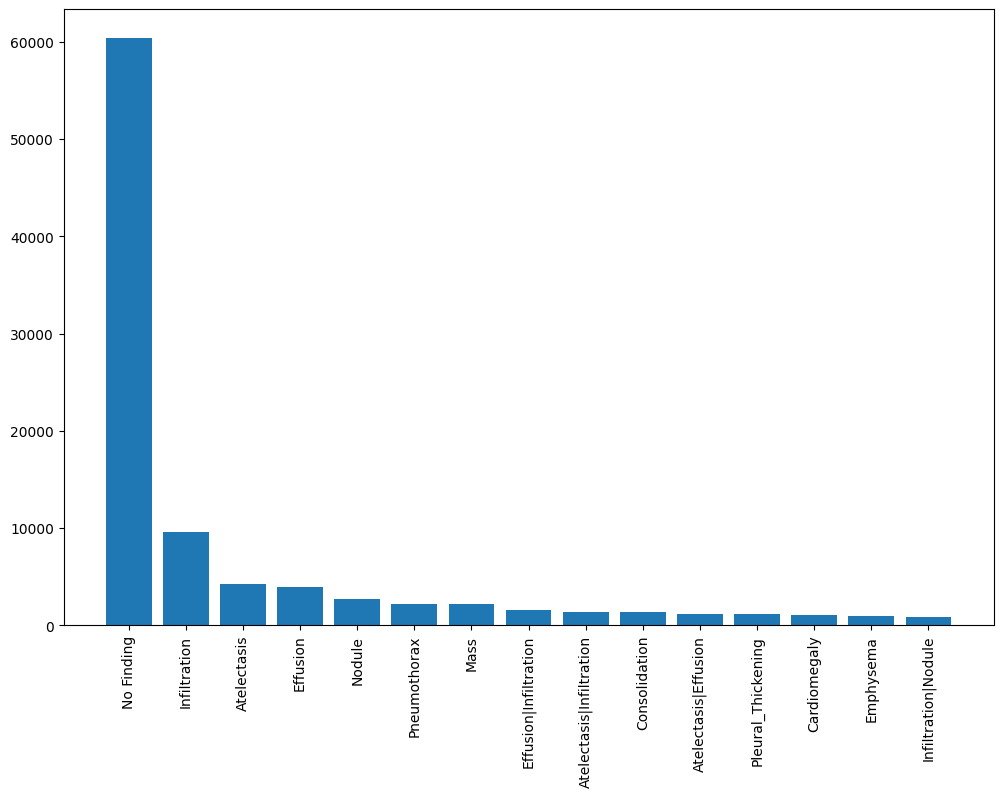

In [8]:
label_counts = data['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

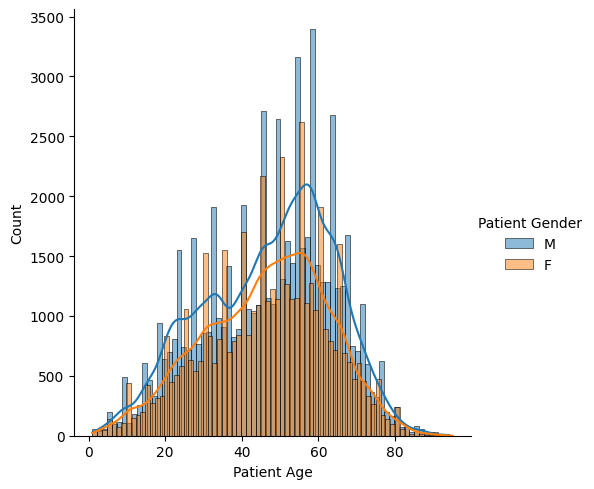

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# On crée une grille de facettes pour l'âge selon le sexe du patient
g = sns.FacetGrid(data, hue='Patient Gender', height=5)
g.map(sns.histplot, 'Patient Age', kde=True)  # On utilise histplot + kde=True pour garder l'effet de l'ancienne distplot
g.add_legend()

plt.show()


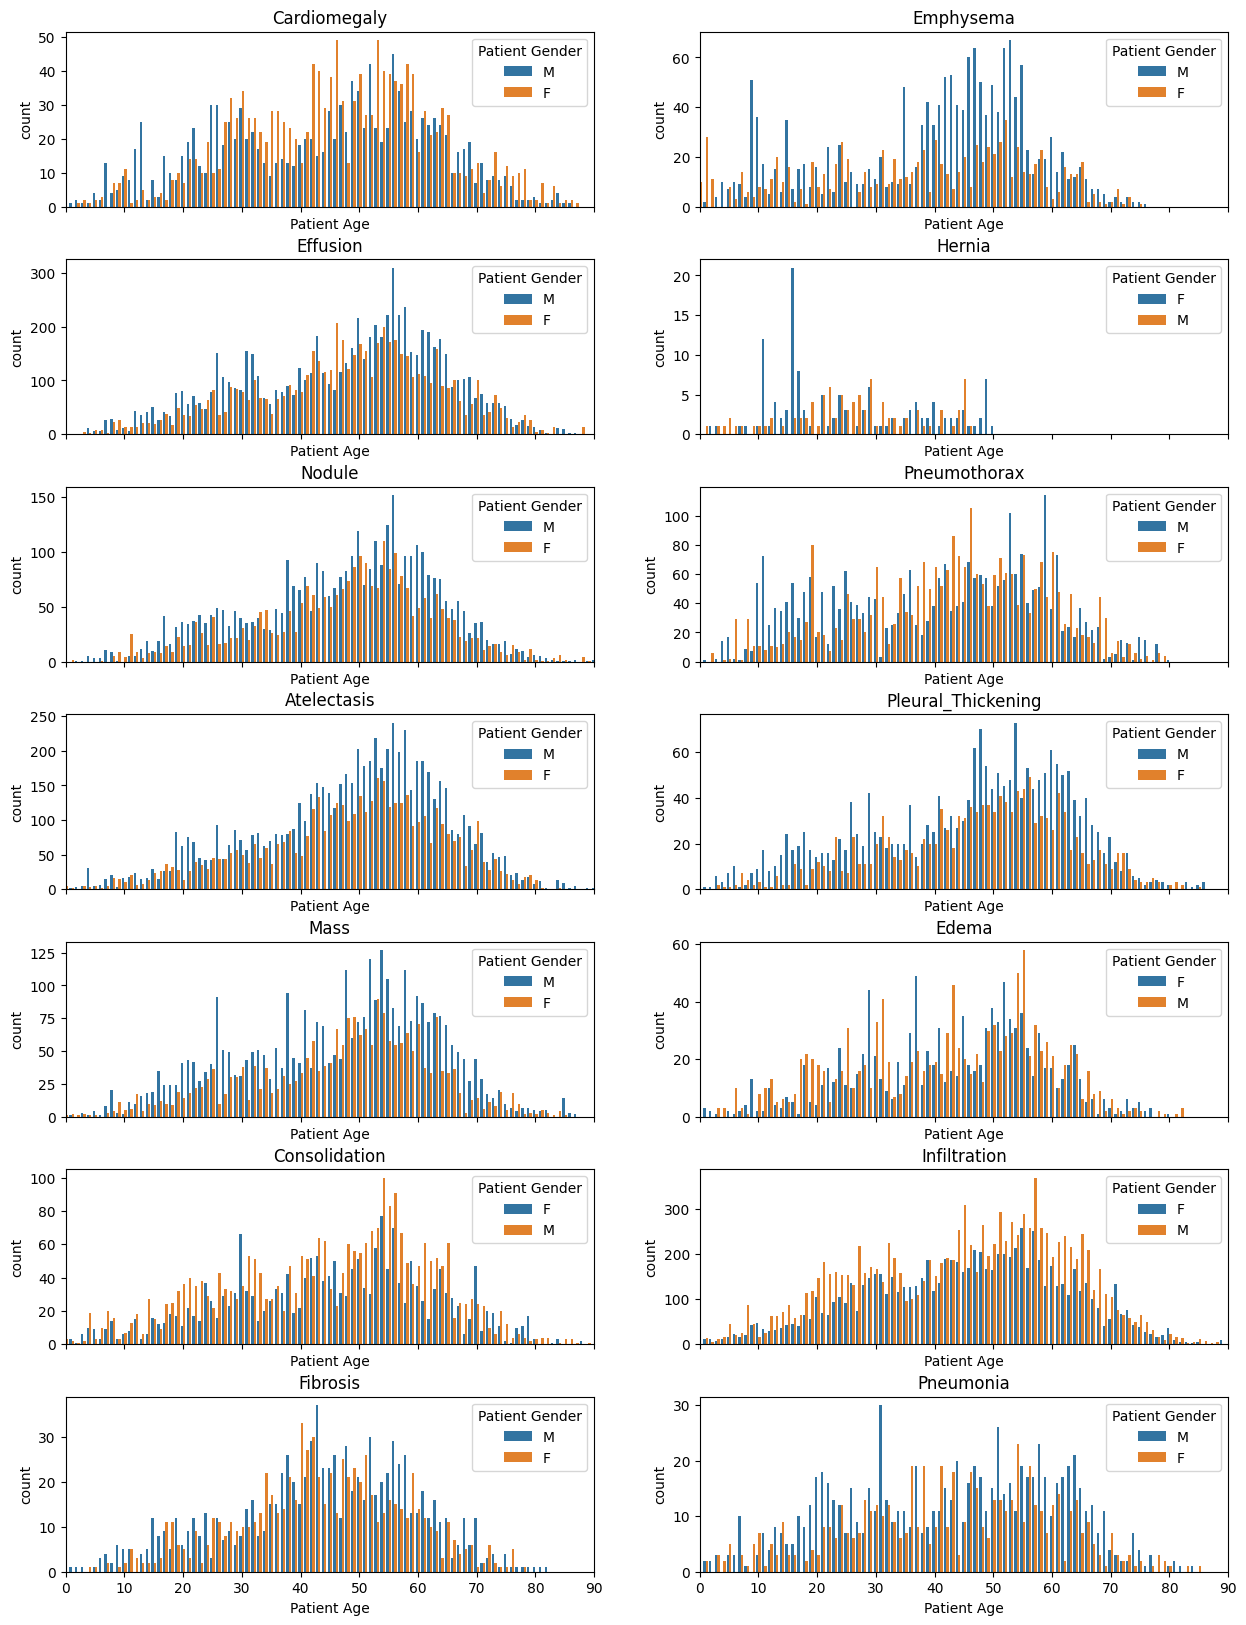

In [11]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
df = data[data['Finding Labels'] != 'No Finding']
i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    index = []
    for k in range(len(df)):
        if pathology in df.iloc[k]['Finding Labels']:
            index.append(k)
    g=sns.countplot(x='Patient Age', hue="Patient Gender",data=df.iloc[index], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

In [12]:
for pathology in pathology_list :
    data[pathology] = data['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

In [13]:
data.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender  Labels_Count  Cardiomegaly  Emphysema  \
0           58              M             1             1          0   
1           58              M             2             1          1   
2           58              M             2             1          0   
3           81              M             0             0          0   
4           81              F             1             0          0   

   Effusion  ...  Nodule  Pneumothorax  Atelectasis  Pleural_Thickening  Mass  \
0         0  ...       0             0            0                   0     0   
1         0  ...       0             0            0                   0     0   
2         1  ...       0             0            0                   0     0   
3         0  ...       0             0            0                   0     0   
4         0  ...       0             0            0                   0     0   

   Edema  Consolidation  Infiltration  Fibrosis  Pneumonia  
0      0              0             0         0          0  
1      0              0             0         0          0  
2      0              0             0         0          0  
3      0              0             0         0          0  
4      0              0             0         0          0  

[5 rows x 21 columns]

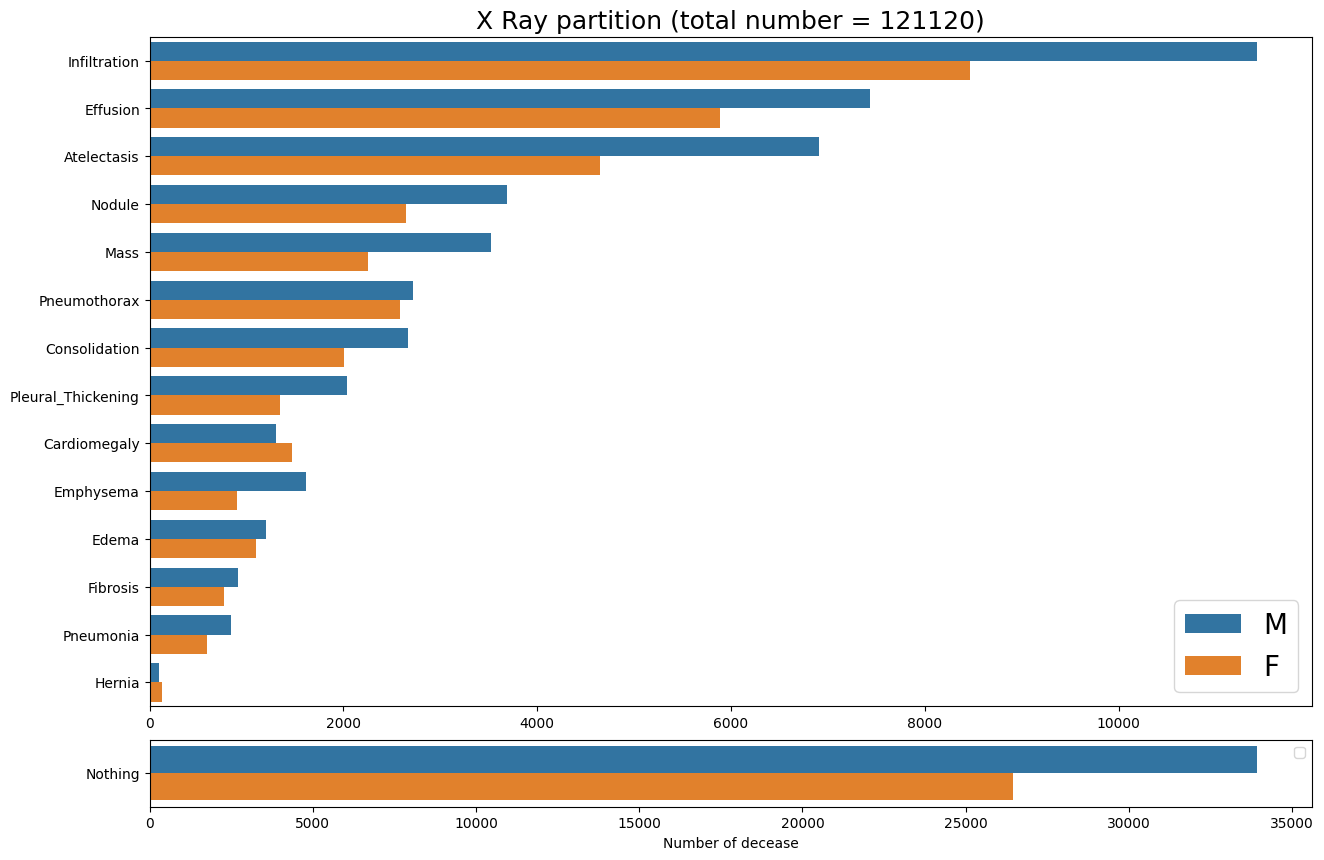

In [14]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(data,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=18);

data['Nothing']=data['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(data,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

In [15]:
df=data.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=df[['|' in index for index in df.index]].copy()
df2=df[['|' not in index for index in df.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values

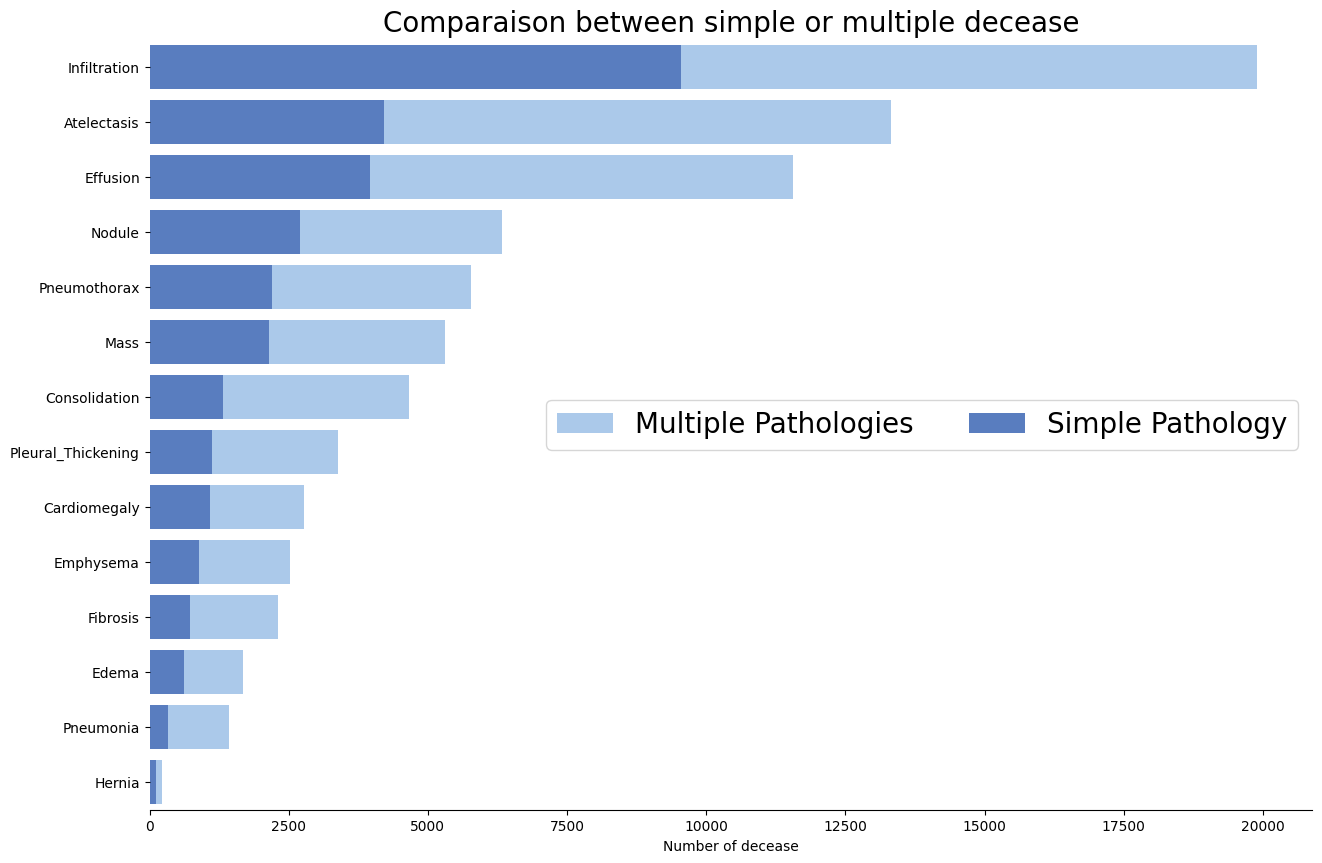

In [16]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)      
sns.despine(left=True)

In [17]:
#we just keep groups of pathologies which appear more than 30 times
df3=df1.loc[df1['Patient ID']>30,['Patient ID','Finding Labels']]

for pathology in pathology_list:
    df3[pathology]=df3.apply(lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0, axis=1)

df3.head(20)

Patient ID  \
Finding Labels                                  
Effusion|Infiltration                    1603   
Atelectasis|Infiltration                 1350   
Atelectasis|Effusion                     1165   
Infiltration|Nodule                       829   
Atelectasis|Effusion|Infiltration         737   
Cardiomegaly|Effusion                     484   
Consolidation|Infiltration                441   
Infiltration|Mass                         418   
Effusion|Pneumothorax                     403   
Effusion|Mass                             402   
Atelectasis|Consolidation                 398   
Mass|Nodule                               394   
Edema|Infiltration                        392   
Infiltration|Pneumothorax                 345   
Consolidation|Effusion                    337   
Emphysema|Pneumothorax                    337   
Effusion|Pleural_Thickening               251   
Effusion|Nodule                           249   
Atelectasis|Pneumothorax                  240   
Infiltration|Pleural_Thickening           210   

                                                      Finding Labels  \
Finding Labels                                                         
Effusion|Infiltration                          Effusion|Infiltration   
Atelectasis|Infiltration                    Atelectasis|Infiltration   
Atelectasis|Effusion                            Atelectasis|Effusion   
Infiltration|Nodule                              Infiltration|Nodule   
Atelectasis|Effusion|Infiltration  Atelectasis|Effusion|Infiltration   
Cardiomegaly|Effusion                          Cardiomegaly|Effusion   
Consolidation|Infiltration                Consolidation|Infiltration   
Infiltration|Mass                                  Infiltration|Mass   
Effusion|Pneumothorax                          Effusion|Pneumothorax   
Effusion|Mass                                          Effusion|Mass   
Atelectasis|Consolidation                  Atelectasis|Consolidation   
Mass|Nodule                                              Mass|Nodule   
Edema|Infiltration                                Edema|Infiltration   
Infiltration|Pneumothorax                  Infiltration|Pneumothorax   
Consolidation|Effusion                        Consolidation|Effusion   
Emphysema|Pneumothorax                        Emphysema|Pneumothorax   
Effusion|Pleural_Thickening              Effusion|Pleural_Thickening   
Effusion|Nodule                                      Effusion|Nodule   
Atelectasis|Pneumothorax                    Atelectasis|Pneumothorax   
Infiltration|Pleural_Thickening      Infiltration|Pleural_Thickening   

                                   Cardiomegaly  Emphysema  Effusion  Hernia  \
Finding Labels                                                                 
Effusion|Infiltration                         0          0      1603       0   
Atelectasis|Infiltration                      0          0         0       0   
Atelectasis|Effusion                          0          0      1165       0   
Infiltration|Nodule                           0          0         0       0   
Atelectasis|Effusion|Infiltration             0          0       737       0   
Cardiomegaly|Effusion                       484          0       484       0   
Consolidation|Infiltration                    0          0         0       0   
Infiltration|Mass                             0          0         0       0   
Effusion|Pneumothorax                         0          0       403       0   
Effusion|Mass                                 0          0       402       0   
Atelectasis|Consolidation                     0          0         0       0   
Mass|Nodule                                   0          0         0       0   
Edema|Infiltration                            0          0         0       0   
Infiltration|Pneumothorax                     0          0         0       0   
Consolidation|Effusion                        0          0       337       0   
Emphysema|P

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
import keras


In [2]:
data = pd.read_csv('Data_Entry_2017.csv')
data = data[data['Patient Age']<100] #removing datapoints which having age greater than 100
data_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'input', 'images*', '*', '*.png'))}
print('Scans found:', len(data_image_paths), ', Total Headers', data.shape[0])
data['path'] = data['Image Index'].map(data_image_paths.get)
data['Patient Age'] = data['Patient Age'].map(lambda x: int(x))
data.sample(3)

Scans found: 0 , Total Headers 112104


Image Index                     Finding Labels  Follow-up #  \
84574  00020819_006.png  Atelectasis|Effusion|Infiltration            6   
70786  00017458_004.png                         No Finding            4   
55512  00013904_008.png                         No Finding            8   

       Patient ID  Patient Age Patient Gender View Position  \
84574       20819           71              F            PA   
70786       17458           44              F            PA   
55512       13904           43              M            AP   

       OriginalImage[Width  Height]  OriginalImagePixelSpacing[x     y]  \
84574                 2992     2991                        0.143  0.143   
70786                 2992     2991                        0.143  0.143   
55512                 2500     2048                        0.168  0.168   

       Unnamed: 11  path  
84574          NaN  None  
70786          NaN  None  
55512          NaN  None

In [3]:
data['Finding Labels'] = data['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Image Index                         Finding Labels  Follow-up #  \
86641  00021374_018.png  Atelectasis|Infiltration|Pneumothorax           18   
77721  00019097_007.png                           Pneumothorax            7   
49290  00012502_007.png                                                   7   

       Patient ID  Patient Age Patient Gender View Position  \
86641       21374           81              M            PA   
77721       19097           64              M            PA   
49290       12502           29              M            PA   

       OriginalImage[Width  Height]  OriginalImagePixelSpacing[x  ...  \
86641                 2992     2991                        0.143  ...   
77721                 2778     2991                        0.143  ...   
49290                 2992     2981                        0.143  ...   

       Effusion  Emphysema Fibrosis  Hernia  Infiltration  Mass  Nodule  \
86641       0.0        0.0      0.0     0.0           1.0   0.0     0.0   
77721       0.0        0.0      0.0     0.0           0.0   0.0     0.0   
49290       0.0        0.0      0.0     0.0           0.0   0.0     0.0   

       Pleural_Thickening  Pneumonia  Pneumothorax  
86641                 0.0        0.0           1.0  
77721                 0.0        0.0           1.0  
49290                 0.0        0.0           0.0  

[3 rows x 27 columns]

In [4]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if data[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(data[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11558), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2302), ('Effusion', 13316), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19891), ('Mass', 5779), ('Nodule', 6331), ('Pleural_Thickening', 3384), ('Pneumonia', 1430), ('Pneumothorax', 5301)]


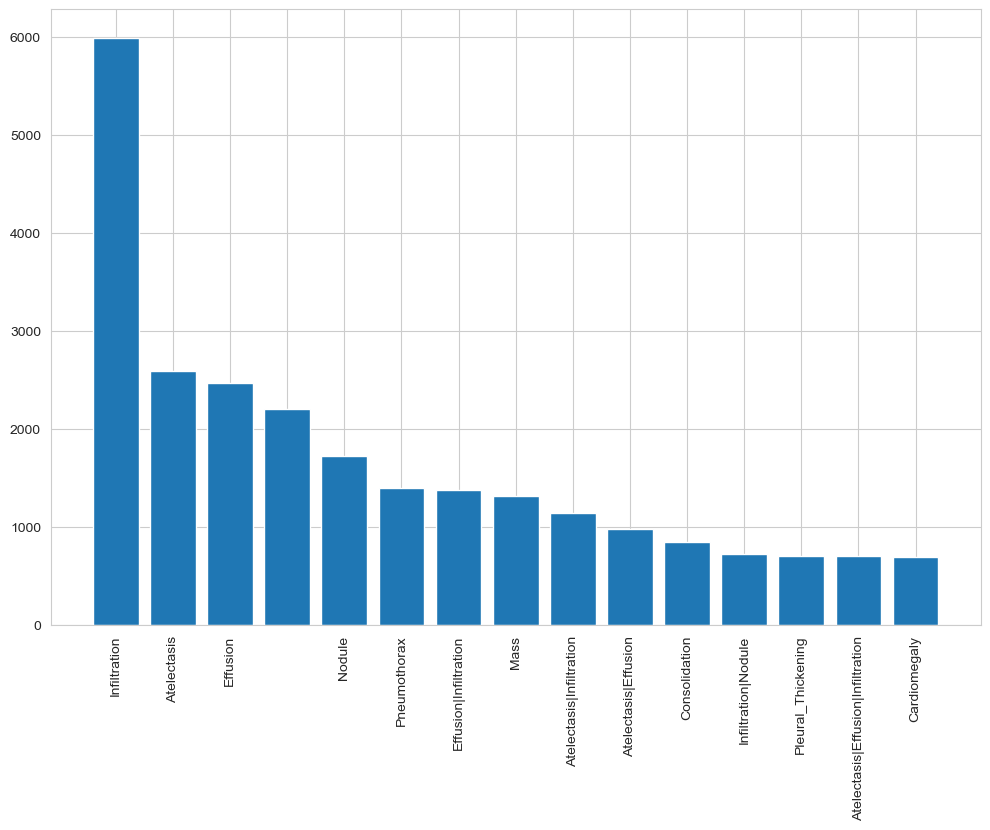

In [5]:
import matplotlib.pyplot as plt
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.04 + number of findings
sample_weights = data['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
data = data.sample(40000, weights=sample_weights)

label_counts = data['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [6]:
# creating vector of diseases
data['disease_vec'] = data.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [8]:

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, 
                                   test_size = 0.20, 
                                   random_state = 2018,
                                   stratify = data['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'test', test_df.shape[0])

train 32000 test 8000


In [17]:
train_df.to_csv("train_df.csv", index=False) 

In [18]:
test_df.to_csv("test_df.csv", index=False)

In [9]:

train_df, valid_df = train_test_split(train_df, 
                                   test_size = 0.10, 
                                   random_state = 2018,
                                   stratify = train_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'valid', valid_df.shape[0])

train 28800 valid 3200


In [20]:
valid_df.to_csv("valid_df.csv", index=False) 

Scanning image folders...
Found 112120 images across all folders
Matched 28800 images with entries in the CSV file
Loading images and their labels...


100%|██████████| 28800/28800 [31:23<00:00, 15.29it/s] 



Loaded 28800 images
Image shape example: (1024, 1024)

Disease statistics:
Atelectasis: 6596 positive cases (22.90%)
Cardiomegaly: 1600 positive cases (5.56%)
Consolidation: 2796 positive cases (9.71%)
Edema: 1386 positive cases (4.81%)
Effusion: 7878 positive cases (27.35%)
Emphysema: 1421 positive cases (4.93%)
Fibrosis: 962 positive cases (3.34%)
Hernia: 114 positive cases (0.40%)
Infiltration: 10946 positive cases (38.01%)
Mass: 3309 positive cases (11.49%)
Nodule: 3581 positive cases (12.43%)
Pleural_Thickening: 1973 positive cases (6.85%)
Pneumonia: 859 positive cases (2.98%)
Pneumothorax: 3052 positive cases (10.60%)


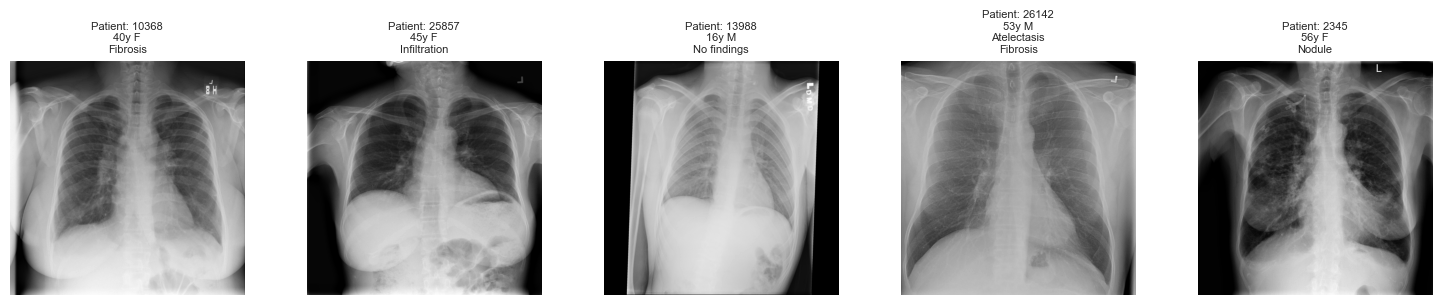

In [22]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

def load_chest_xray_dataset(csv_path, image_folders):
    """
    Load chest X-ray images and their corresponding labels from multiple folders.
    
    Args:
        csv_path (str): Path to the CSV file containing image metadata and labels
        image_folders (list): List of folder paths containing the images (e.g., ["images_001/images", "images_002/images"])
    
    Returns:
        tuple: (images, labels, dataframe)
            - images: List of loaded image arrays
            - labels: Dictionary mapping each disease to its binary labels
            - dataframe: Pandas DataFrame with filtered rows for found images
    """
    # Read the dataset CSV file
    df = pd.read_csv(csv_path)
    
    # List of all possible findings/diseases in the dataset
    diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 
                'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 
                'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
    
    # Create a dictionary to store all available image paths
    available_images = {}
    
    # Find all image files across the specified folders
    print("Scanning image folders...")
    for folder in image_folders:
        if not os.path.exists(folder):
            print(f"Warning: Folder {folder} does not exist")
            continue
            
        image_files = glob.glob(os.path.join(folder, "*.png"))
        for img_path in image_files:
            img_name = os.path.basename(img_path)
            available_images[img_name] = img_path
    
    print(f"Found {len(available_images)} images across all folders")
    
    # Filter the dataframe to include only images that were found
    found_images = df['Image Index'].isin(available_images.keys())
    filtered_df = df[found_images].copy()
    
    print(f"Matched {len(filtered_df)} images with entries in the CSV file")
    
    if len(filtered_df) == 0:
        print("No matching images found. Check image paths and CSV file.")
        return [], {}, filtered_df
    
    # Load images and labels
    images = []
    labels = {disease: [] for disease in diseases}
    
    print("Loading images and their labels...")
    for idx, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
        img_name = row['Image Index']
        img_path = available_images[img_name]
        
        # Load and convert image to numpy array
        try:
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
            
            # Extract labels for each disease
            for disease in diseases:
                labels[disease].append(int(row[disease]))
                
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")
            continue
    
    # Convert label lists to numpy arrays
    for disease in diseases:
        labels[disease] = np.array(labels[disease])
    
    return images, labels, filtered_df

def display_sample_images(images, labels, df, num_samples=5):
    """
    Display sample images with their corresponding labels
    
    Args:
        images (list): List of image arrays
        labels (dict): Dictionary of labels
        df (DataFrame): DataFrame containing image metadata
        num_samples (int): Number of sample images to display
    """
    if len(images) == 0:
        print("No images to display")
        return
        
    num_samples = min(num_samples, len(images))
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    diseases = list(labels.keys())
    
    for i in range(num_samples):
        if num_samples == 1:
            ax = axes
        else:
            ax = axes[i]
            
        ax.imshow(images[i], cmap='gray')
        
        # Get the findings for this image
        findings = []
        for disease in diseases:
            if labels[disease][i] == 1:
                findings.append(disease)
                
        # Set title with patient info and findings
        title = f"Patient: {df.iloc[i]['Patient ID']}\n"
        title += f"{df.iloc[i]['Patient Age']}y {df.iloc[i]['Patient Gender']}\n"
        
        if findings:
            title += "\n".join([f for f in findings])
        else:
            title += "No findings"
            
        ax.set_title(title, fontsize=8)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Path to the CSV file
    csv_path = "train_df.csv"  # Update this path
    
    # List of image folders to search
    image_folders = [f"images_{str(i).zfill(3)}/images" for i in range(1, 13)]
    
    # Load the dataset
    images, labels, filtered_df = load_chest_xray_dataset(csv_path, image_folders)
    
    # Print some statistics
    if images:
        print(f"\nLoaded {len(images)} images")
        print(f"Image shape example: {images[0].shape}")
        
        # Count number of positive cases for each disease
        print("\nDisease statistics:")
        for disease, label_array in labels.items():
            positive_count = np.sum(label_array)
            print(f"{disease}: {positive_count} positive cases ({positive_count/len(label_array)*100:.2f}%)")
        
        # Display sample images
        display_sample_images(images, labels, filtered_df)
    else:
        print("No images were loaded. Please check the file paths.")

# To use this script, update the csv_path variable with the path to your dataset CSV file.
# You may also need to adjust the image_folders paths based on your directory structure.

In [11]:

from keras.applications.densenet import DenseNet121, preprocess_input

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, 
    average_precision_score, confusion_matrix,
    classification_report
)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa

class ChestXrayClassifier:
    def __init__(self, image_size=(224, 224), batch_size=32, num_classes=14):
        """
        Initialize the chest X-ray classifier
        
        Args:
            image_size (tuple): Input image dimensions (height, width)
            batch_size (int): Batch size for training
            num_classes (int): Number of disease classes to predict
        """
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.model = None
        self.history = None
        self.class_names = [
            'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
            'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
            'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'
        ]
    
    def preprocess_images(self, images):
        """
        Preprocess images for the model
        
        Args:
            images (list): List of image arrays
            
        Returns:
            numpy.ndarray: Preprocessed images
        """
        processed_images = []
        for img in images:
            # Resize image
            img_resized = tf.image.resize(img, self.image_size)
            
            # Convert grayscale to RGB if needed
            if len(img_resized.shape) == 2 or img_resized.shape[-1] == 1:
                img_resized = tf.image.grayscale_to_rgb(
                    tf.expand_dims(img_resized, axis=-1) if len(img_resized.shape) == 2 
                    else img_resized
                )
            
            # Normalize to [0, 1]
            img_normalized = img_resized / 255.0
            processed_images.append(img_normalized)
            
        return np.array(processed_images)
    
    def build_model(self):

        # Base model - DenseNet121 pretrained on ImageNet
        base_model = DenseNet121(
            weights='imagenet',
            include_top=False,
            input_shape=(*self.image_size, 3)
        )

        # Gradual unfreezing: freeze first ~100 layers
        for layer in base_model.layers[:100]:
            layer.trainable = False
        for layer in base_model.layers[100:]:
            layer.trainable = True

        # Custom head
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.3)(x)
        predictions = Dense(self.num_classes, activation='sigmoid')(x)  # sigmoid for multi-label

        # Create the full model
        self.model = Model(inputs=base_model.input, outputs=predictions)

        # Optimizer with a lower learning rate
        optimizer = Adam(learning_rate=1e-4)

        # Use Focal Loss (better for imbalanced datasets) 
        loss_fn = tfa.losses.SigmoidFocalCrossEntropy()

        # Compile model with better metrics
        self.model.compile(
            optimizer=optimizer,
            loss=loss_fn,
            metrics=[
                'accuracy',
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
            ]
        )

        return self.model

    
    def train(self, X_train, y_train, X_val, y_val, epochs=20):
        """
        Train the model
        
        Args:
            X_train (numpy.ndarray): Training images
            y_train (numpy.ndarray): Training labels
            X_val (numpy.ndarray): Validation images
            y_val (numpy.ndarray): Validation labels
            epochs (int): Number of training epochs
            
        Returns:
            tensorflow.keras.callbacks.History: Training history
        """
        if self.model is None:
            self.build_model()
        
        # Data augmentation for training
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        
        # Callbacks
        callbacks = [
            ModelCheckpoint(
                'best_chest_xray_model.h5',
                save_best_only=True,
                monitor='val_auc',
                mode='max'
            ),
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=3,
                min_lr=1e-6
            )
        ]
        
        print("Training model...")
        self.history = self.model.fit(
            datagen.flow(X_train, y_train, batch_size=self.batch_size),
            validation_data=(X_val, y_val),
            epochs=epochs,
            callbacks=callbacks
        )
        
        return self.history
    
    def fine_tune(self, X_train, y_train, X_val, y_val, epochs=10):
        """
        Fine-tune the model by unfreezing some layers
        
        Args:
            X_train (numpy.ndarray): Training images
            y_train (numpy.ndarray): Training labels
            X_val (numpy.ndarray): Validation images
            y_val (numpy.ndarray): Validation labels
            epochs (int): Number of training epochs
            
        Returns:
            tensorflow.keras.callbacks.History: Training history
        """
        if self.model is None:
            raise ValueError("Model must be trained before fine-tuning")
        
        # Unfreeze some layers
        for layer in self.model.layers[-20:]:
            layer.trainable = True
        
        # Recompile with lower learning rate
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
        )
        
        # Callbacks
        callbacks = [
            ModelCheckpoint(
                'best_chest_xray_model_finetuned.h5',
                save_best_only=True,
                monitor='val_auc',
                mode='max'
            ),
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=3,
                min_lr=1e-7
            )
        ]
        
        print("Fine-tuning model...")
        fine_tune_history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=self.batch_size // 2,  # Smaller batch size for fine-tuning
            callbacks=callbacks
        )
        
        # Combine histories
        for key in fine_tune_history.history:
            self.history.history[key].extend(fine_tune_history.history[key])
        
        return fine_tune_history
    
    def predict(self, X):
        """
        Make predictions on new data
        
        Args:
            X (numpy.ndarray): Images to predict
            
        Returns:
            numpy.ndarray: Predicted probabilities for each class
        """
        return self.model.predict(X)
    
    def evaluate(self, X_test, y_test):
        """
        Evaluate model performance
        
        Args:
            X_test (numpy.ndarray): Test images
            y_test (numpy.ndarray): Test labels
            
        Returns:
            dict: Dictionary of evaluation metrics
        """
        # Get predictions
        y_pred = self.predict(X_test)
        
        # Calculate ROC AUC for each class
        roc_auc = {}
        for i, disease in enumerate(self.class_names):
            if np.sum(y_test[:, i]) > 0:  # Only if there are positive samples
                roc_auc[disease] = auc(
                    *roc_curve(y_test[:, i], y_pred[:, i])[:2]
                )
        
        # Calculate average precision for each class
        avg_precision = {}
        for i, disease in enumerate(self.class_names):
            if np.sum(y_test[:, i]) > 0:  # Only if there are positive samples
                avg_precision[disease] = average_precision_score(
                    y_test[:, i], y_pred[:, i]
                )
        
        # Binary predictions using threshold of 0.5
        y_pred_binary = (y_pred > 0.5).astype(int)
        
        # Calculate other metrics
        metrics = {
            'roc_auc': roc_auc,
            'avg_precision': avg_precision,
            'y_pred': y_pred,
            'y_pred_binary': y_pred_binary
        }
        
        return metrics
    
    def plot_training_history(self):
        """
        Plot training history metrics
        """
        if self.history is None:
            print("No training history available")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot loss
        ax1.plot(self.history.history['loss'], label='Training Loss')
        ax1.plot(self.history.history['val_loss'], label='Validation Loss')
        ax1.set_title('Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        
        # Plot AUC
        ax2.plot(self.history.history['auc'], label='Training AUC')
        ax2.plot(self.history.history['val_auc'], label='Validation AUC')
        ax2.set_title('AUC')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('AUC')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
    
    def plot_roc_curves(self, X_test, y_test):
        """
        Plot ROC curves for each disease class
        
        Args:
            X_test (numpy.ndarray): Test images
            y_test (numpy.ndarray): Test labels
        """
        # Get predictions
        y_pred = self.predict(X_test)
        
        # Calculate and plot ROC curve for each class
        plt.figure(figsize=(15, 12))
        
        # Define a colormap
        colors = plt.cm.jet(np.linspace(0, 1, len(self.class_names)))
        
        for i, (disease, color) in enumerate(zip(self.class_names, colors)):
            if np.sum(y_test[:, i]) > 0:  # Only if there are positive samples
                fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
                roc_auc = auc(fpr, tpr)
                
                plt.plot(
                    fpr, tpr, lw=2, color=color,
                    label=f'{disease} (AUC = {roc_auc:.3f})'
                )
        
        # Plot diagonal line
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curves')
        plt.legend(loc="lower right", fontsize=10)
        plt.grid(True)
        plt.show()
    
    def plot_precision_recall_curves(self, X_test, y_test):
        """
        Plot precision-recall curves for each disease class
        
        Args:
            X_test (numpy.ndarray): Test images
            y_test (numpy.ndarray): Test labels
        """
        # Get predictions
        y_pred = self.predict(X_test)
        
        # Calculate and plot precision-recall curve for each class
        plt.figure(figsize=(15, 12))
        
        # Define a colormap
        colors = plt.cm.jet(np.linspace(0, 1, len(self.class_names)))
        
        for i, (disease, color) in enumerate(zip(self.class_names, colors)):
            if np.sum(y_test[:, i]) > 0:  # Only if there are positive samples
                precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
                avg_precision = average_precision_score(y_test[:, i], y_pred[:, i])
                
                plt.plot(
                    recall, precision, lw=2, color=color,
                    label=f'{disease} (AP = {avg_precision:.3f})'
                )
        
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curves')
        plt.legend(loc="lower left", fontsize=10)
        plt.grid(True)
        plt.show()
    
    def plot_confusion_matrices(self, X_test, y_test, diseases_to_plot=None):
        """
        Plot confusion matrices for selected diseases
        
        Args:
            X_test (numpy.ndarray): Test images
            y_test (numpy.ndarray): Test labels
            diseases_to_plot (list): List of disease names to plot confusion matrices for,
                                    if None, all diseases will be plotted
        """
        # Get binary predictions
        y_pred = (self.predict(X_test) > 0.5).astype(int)
        
        if diseases_to_plot is None:
            diseases_to_plot = self.class_names
        
        # Calculate number of rows and columns for subplots
        n_diseases = len(diseases_to_plot)
        n_cols = min(3, n_diseases)
        n_rows = (n_diseases + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = np.array([axes])
        axes = axes.flatten()
        
        for i, disease in enumerate(diseases_to_plot):
            if i < len(axes):
                disease_idx = self.class_names.index(disease)
                cm = confusion_matrix(y_test[:, disease_idx], y_pred[:, disease_idx])
                
                # Plot confusion matrix
                sns.heatmap(
                    cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'],
                    ax=axes[i]
                )
                axes[i].set_title(f'Confusion Matrix - {disease}')
                axes[i].set_xlabel('Predicted')
                axes[i].set_ylabel('Actual')
        
        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def visualize_predictions(self, X_test, y_test, filtered_df=None, num_samples=10):
        """
        Visualize model predictions on test samples
        
        Args:
            X_test (numpy.ndarray): Test images
            y_test (numpy.ndarray): Test labels
            filtered_df (pandas.DataFrame): DataFrame with image metadata
            num_samples (int): Number of samples to visualize
        """
        # Get predictions
        y_pred = self.predict(X_test)
        y_pred_binary = (y_pred > 0.5).astype(int)
        
        # Choose random samples
        indices = np.random.choice(len(X_test), min(num_samples, len(X_test)), replace=False)
        
        # Create figure
        fig, axes = plt.subplots(len(indices), 2, figsize=(15, 4 * len(indices)))
        
        if len(indices) == 1:
            axes = np.array([axes])
            
        for i, idx in enumerate(indices):
            # Get sample image and labels
            img = X_test[idx]
            true_labels = y_test[idx]
            pred_labels = y_pred[idx]
            pred_binary = y_pred_binary[idx]
            
            # Display image
            axes[i, 0].imshow(img)
            axes[i, 0].set_title('X-ray Image')
            axes[i, 0].axis('off')
            
            # Display patient info if available
            if filtered_df is not None:
                df_idx = filtered_df.index[indices[i]]
                patient_id = filtered_df.loc[df_idx, 'Patient ID']
                patient_age = filtered_df.loc[df_idx, 'Patient Age']
                patient_gender = filtered_df.loc[df_idx, 'Patient Gender']
                axes[i, 0].set_xlabel(f"Patient: {patient_id}, {patient_age}y {patient_gender}")
            
            # Create bar chart for predictions
            true_diseases = [self.class_names[j] for j in range(len(true_labels)) if true_labels[j] == 1]
            pred_diseases = [self.class_names[j] for j in range(len(pred_binary)) if pred_binary[j] == 1]
            
            # Create a table of predictions
            cell_text = []
            for j, disease in enumerate(self.class_names):
                cell_text.append([
                    disease,
                    'Yes' if true_labels[j] == 1 else 'No',
                    'Yes' if pred_binary[j] == 1 else 'No',
                    f"{pred_labels[j]:.3f}"
                ])
            
            # Color table rows based on correctness
            cell_colors = []
            for j in range(len(self.class_names)):
                if true_labels[j] == pred_binary[j]:
                    cell_colors.append(['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen'])
                else:
                    cell_colors.append(['lightcoral', 'lightcoral', 'lightcoral', 'lightcoral'])
            
            axes[i, 1].axis('tight')
            axes[i, 1].axis('off')
            table = axes[i, 1].table(
                cellText=cell_text,
                colLabels=['Disease', 'True', 'Predicted', 'Probability'],
                cellColours=cell_colors,
                loc='center',
                cellLoc='center'
            )
            table.auto_set_font_size(False)
            table.set_fontsize(8)
            table.scale(1, 1.5)
            axes[i, 1].set_title('Predictions')
            
        plt.tight_layout()
        plt.show()
    
    def print_classification_reports(self, X_test, y_test):
        """
        Print classification reports for each disease
        
        Args:
            X_test (numpy.ndarray): Test images
            y_test (numpy.ndarray): Test labels
        """
        # Get binary predictions
        y_pred = (self.predict(X_test) > 0.5).astype(int)
        
        print("Classification Reports for Each Disease:")
        print("=" * 80)
        
        for i, disease in enumerate(self.class_names):
            print(f"\n{disease}:")
            print("-" * 80)
            
            # Skip if no positive samples
            if np.sum(y_test[:, i]) == 0:
                print("No positive samples in test set")
                continue
            
            report = classification_report(
                y_test[:, i],
                y_pred[:, i],
                target_names=['Negative', 'Positive']
            )
            print(report)
    
    def save_model(self, filepath):
        """
        Save the model to a file
        
        Args:
            filepath (str): Path to save the model
        """
        if self.model is None:
            print("No model to save")
            return
        
        self.model.save(filepath)
        print(f"Model saved to {filepath}")
    
    def load_model(self, filepath):
        """
        Load a pretrained model
        
        Args:
            filepath (str): Path to the model file
        """
        self.model = tf.keras.models.load_model(filepath)
        print(f"Model loaded from {filepath}")
        return self.model


def run_chest_xray_pipeline(csv_path, image_folders, test_size=0.2, val_size=0.1):
    """
    Run the complete chest X-ray classification pipeline
    
    Args:
        csv_path (str): Path to the CSV file
        image_folders (list): List of image folder paths
        test_size (float): Proportion of data to use for testing
        val_size (float): Proportion of training data to use for validation
        
    Returns:
        ChestXrayClassifier: Trained classifier model
    """
    # Load dataset

    images, labels, filtered_df = load_chest_xray_dataset(csv_path, image_folders)
    
    if len(images) == 0:
        print("No images loaded. Exiting.")
        return None
    
    # Convert images and labels to numpy arrays
    X = np.array(images)
    y = np.array([labels[disease] for disease in labels]).T  # Shape: [n_samples, n_classes]
    
    # Split data into train, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y.sum(axis=1) > 0
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, 
        test_size=val_size/(1-test_size),
        random_state=42,
        stratify=y_train_val.sum(axis=1) > 0
    )
    
    print(f"Training set: {X_train.shape[0]} images")
    print(f"Validation set: {X_val.shape[0]} images")
    print(f"Test set: {X_test.shape[0]} images")
    
    # Initialize and train the classifier
    classifier = ChestXrayClassifier()
    
    # Preprocess images
    X_train_processed = classifier.preprocess_images(X_train)
    X_val_processed = classifier.preprocess_images(X_val)
    X_test_processed = classifier.preprocess_images(X_test)
    
    # Build and train the model
    classifier.build_model()
    classifier.train(X_train_processed, y_train, X_val_processed, y_val, epochs=15)
    
    # Fine-tune the model
    classifier.fine_tune(X_train_processed, y_train, X_val_processed, y_val, epochs=10)
    
    # Plot training history
    classifier.plot_training_history()
    
    # Evaluate the model
    metrics = classifier.evaluate(X_test_processed, y_test)
    
    # Print average AUC and average precision
    mean_auc = np.mean(list(metrics['roc_auc'].values()))
    mean_ap = np.mean(list(metrics['avg_precision'].values()))
    print(f"Mean ROC AUC: {mean_auc:.4f}")
    print(f"Mean Average Precision: {mean_ap:.4f}")
    
    # Print classification reports
    classifier.print_classification_reports(X_test_processed, y_test)
    
    # Plot ROC curves
    classifier.plot_roc_curves(X_test_processed, y_test)
    
    # Plot precision-recall curves
    classifier.plot_precision_recall_curves(X_test_processed, y_test)
    
    # Plot confusion matrices for a few diseases
    top_diseases = ['Pneumonia', 'Effusion', 'Atelectasis', 'Nodule', 'Mass']
    classifier.plot_confusion_matrices(X_test_processed, y_test, top_diseases)
    
    # Visualize predictions
    classifier.visualize_predictions(X_test_processed, y_test, filtered_df)
    
    # Save the model
    classifier.save_model('chest_xray_classifier.h5')
    
    return classifier


Scanning image folders...
Found 112120 images across all folders
Matched 3200 images with entries in the CSV file
Loading and preprocessing images...


100%|██████████| 3200/3200 [02:33<00:00, 20.90it/s]


Successfully processed 3200 images
Processed image shape: (3200, 224, 224, 1)
Training set: 2240 images
Validation set: 320 images
Test set: 640 images
Preparing images for model input...
Input shape for model: (2240, 224, 224, 3)
29084464/29084464 [==============================] - 18s 1us/step
Training model...
Epoch 1/15
70/70 [==============================] - 90s 1s/step - loss: 0.3469 - accuracy: 0.2116 - auc: 0.7176 - val_loss: 0.3159 - val_accuracy: 0.2344 - val_auc: 0.7537 - lr: 0.0010
Epoch 2/15
70/70 [==============================] - 76s 1s/step - loss: 0.3141 - accuracy: 0.2214 - auc: 0.7563 - val_loss: 0.3174 - val_accuracy: 0.2219 - val_auc: 0.7641 - lr: 0.0010
Epoch 3/15
70/70 [==============================] - 74s 1s/step - loss: 0.3062 - accuracy: 0.2451 - auc: 0.7728 - val_loss: 0.3043 - val_accuracy: 0.2625 - val_auc: 0.7811 - lr: 0.0010
Epoch 4/15
70/70 [==============================] - 75s 1s/step - loss: 0.3011 - accuracy: 0.2442 - auc: 0.7828 - val_loss: 0.3029

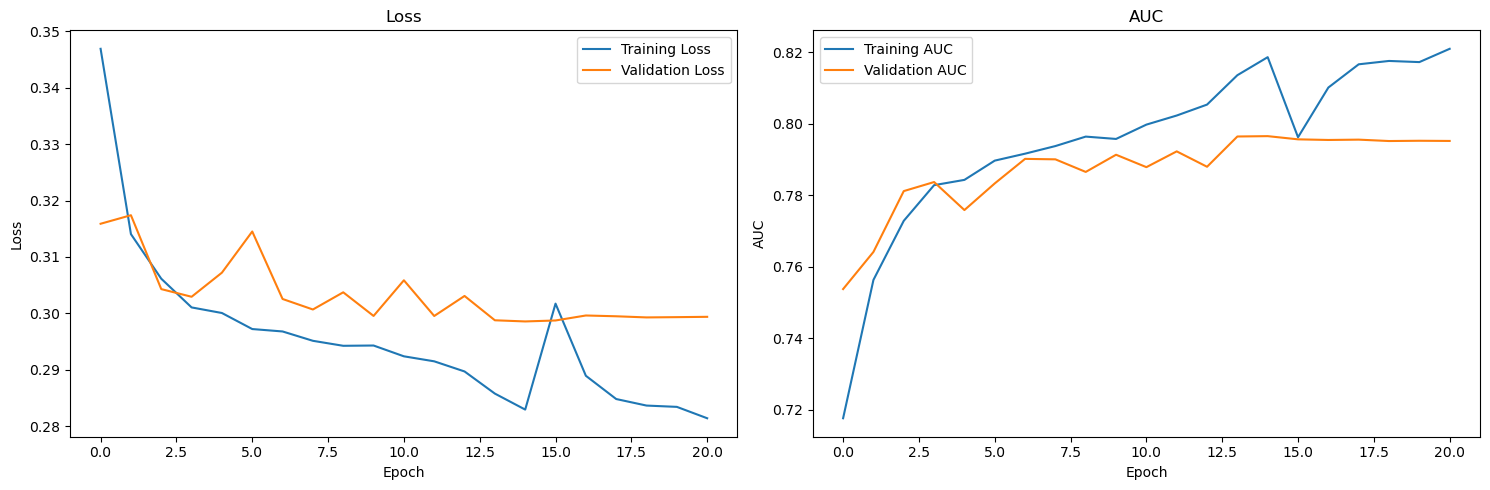

20/20 [==============================] - 18s 782ms/step
Mean ROC AUC: 0.6714
Mean Average Precision: 0.2042
20/20 [==============================] - 16s 774ms/step
Classification Reports for Each Disease:

Atelectasis:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.77      0.98      0.86       490
    Positive       0.29      0.03      0.05       150

    accuracy                           0.76       640
   macro avg       0.53      0.50      0.45       640
weighted avg       0.65      0.76      0.67       640


Cardiomegaly:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.93      1.00      0.97       598
    Positive       0.00      0.00      0.00        42

    accuracy                           0.93       640
   macro avg       0.47      0.50      0.48       640
weigh

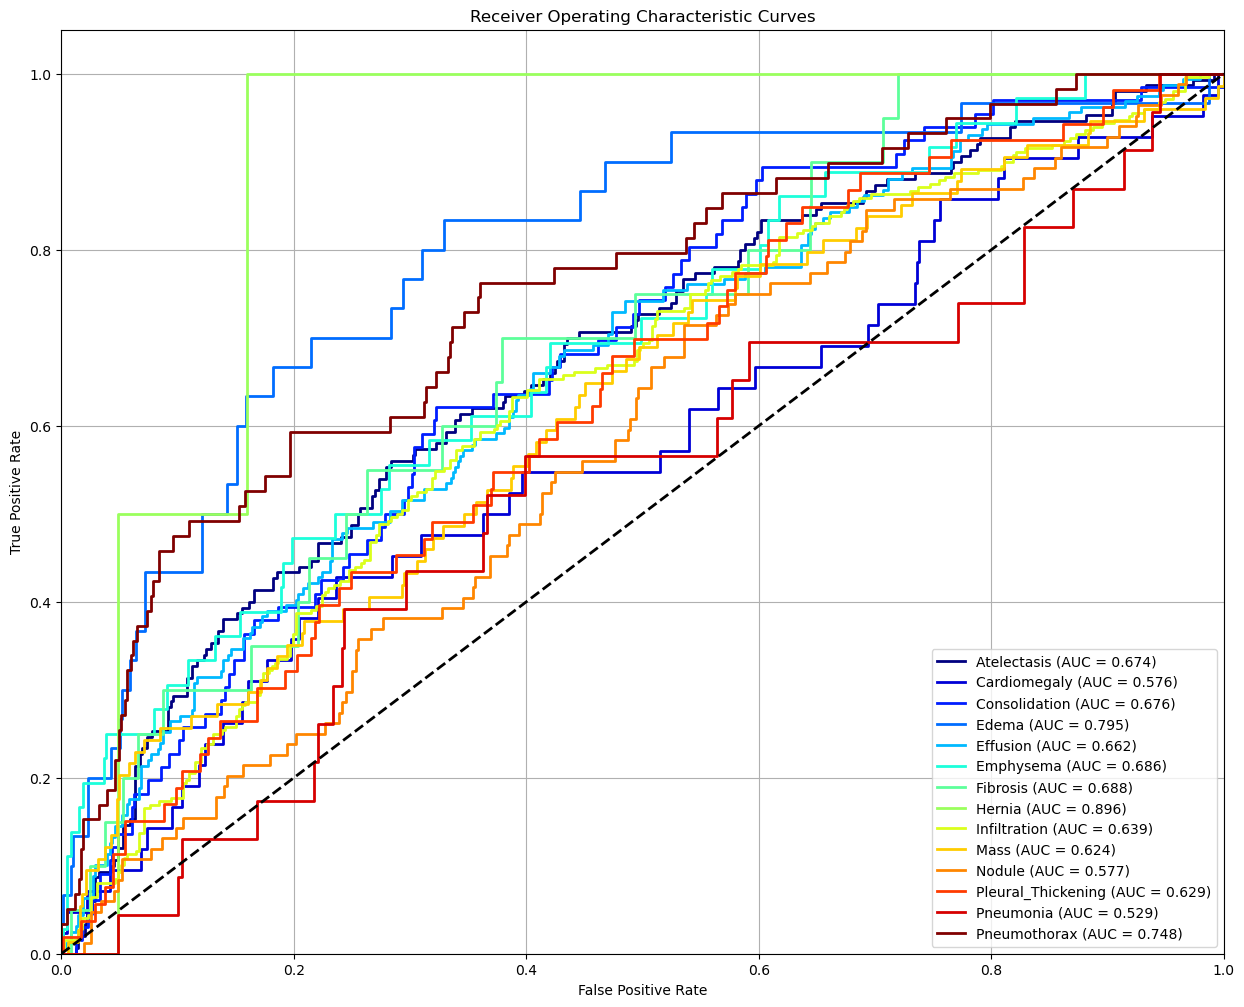

20/20 [==============================] - 16s 788ms/step


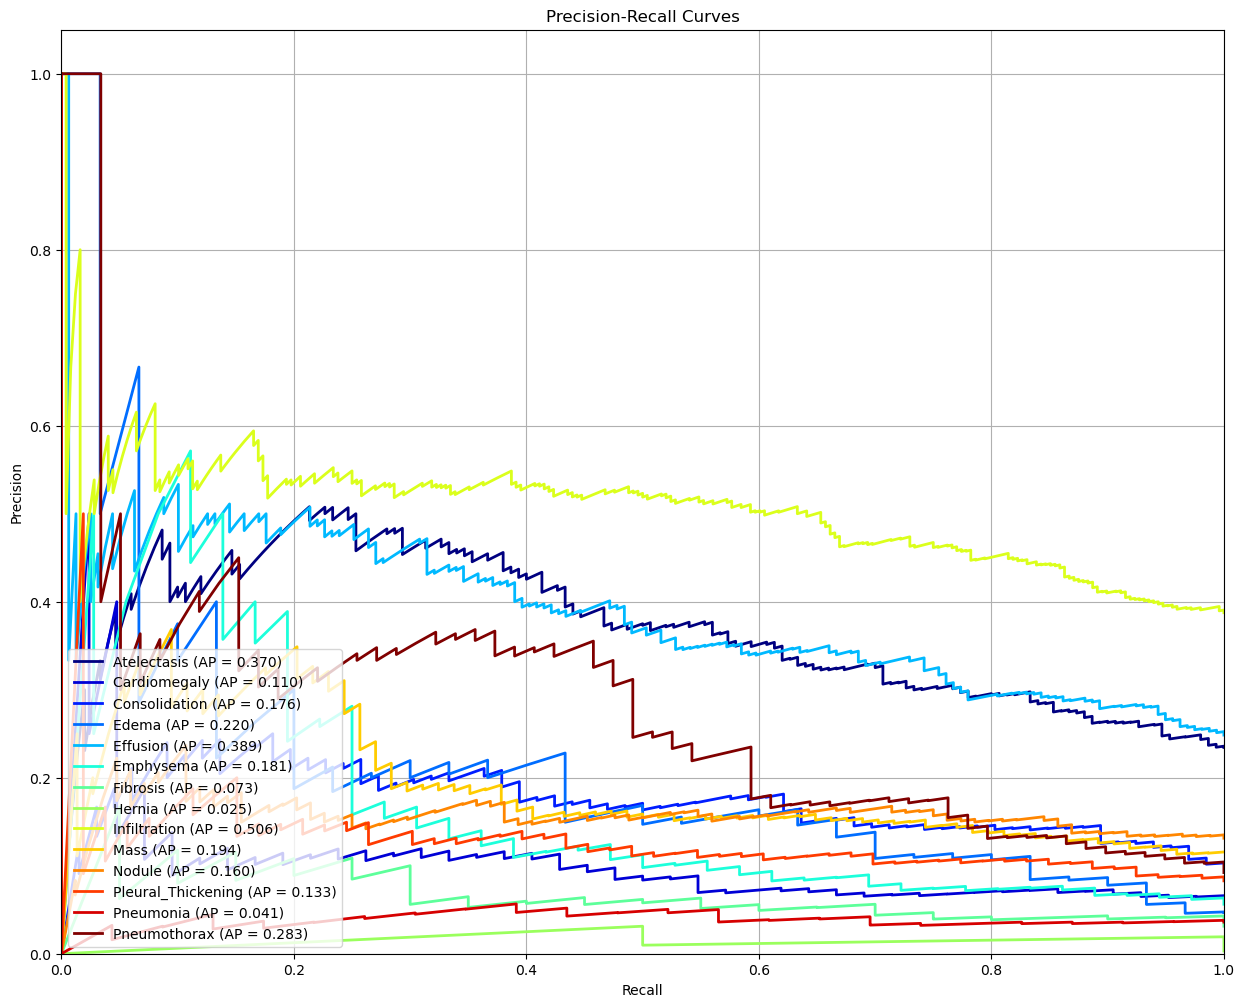

20/20 [==============================] - 16s 787ms/step


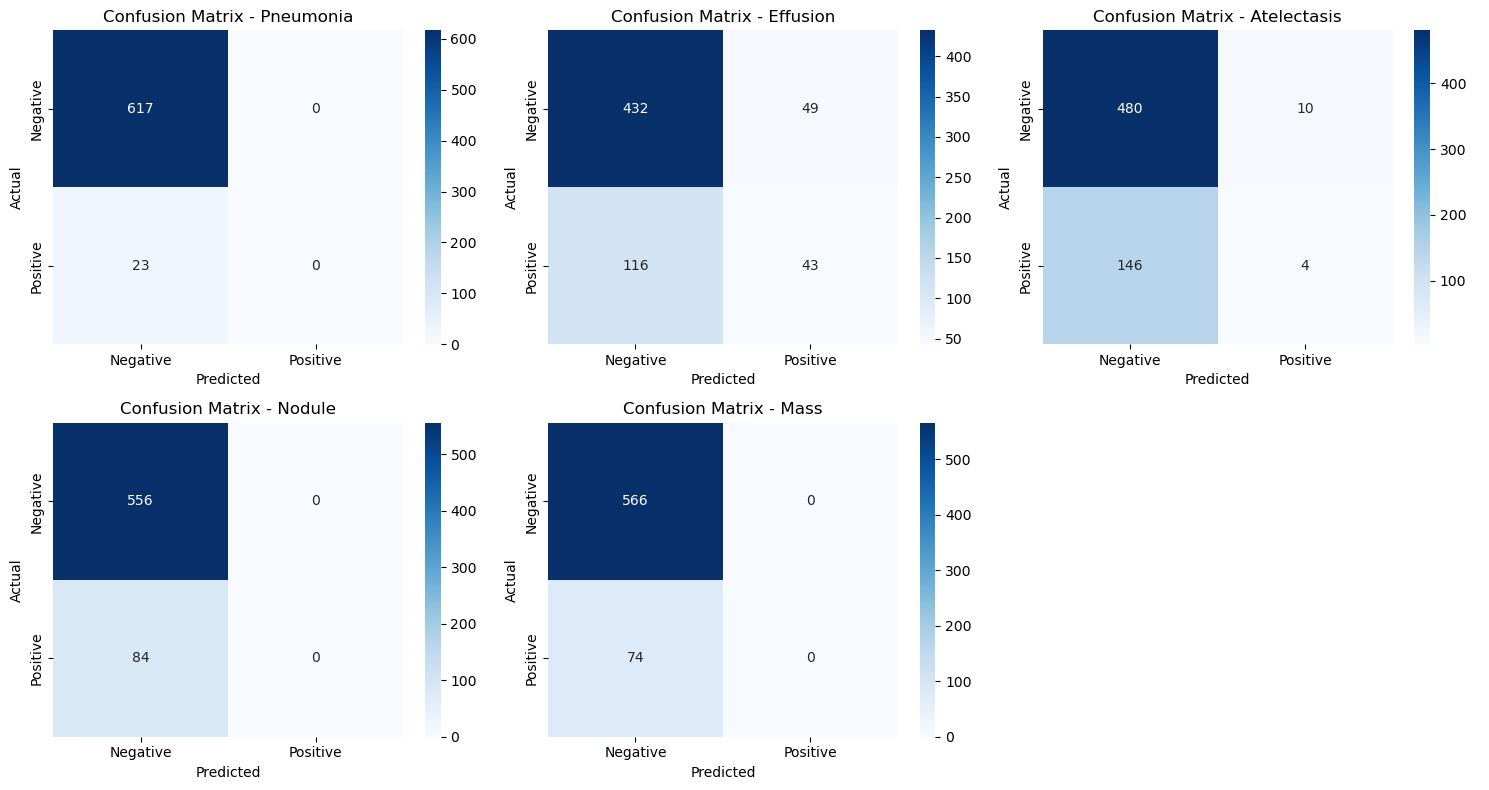

20/20 [==============================] - 16s 789ms/step


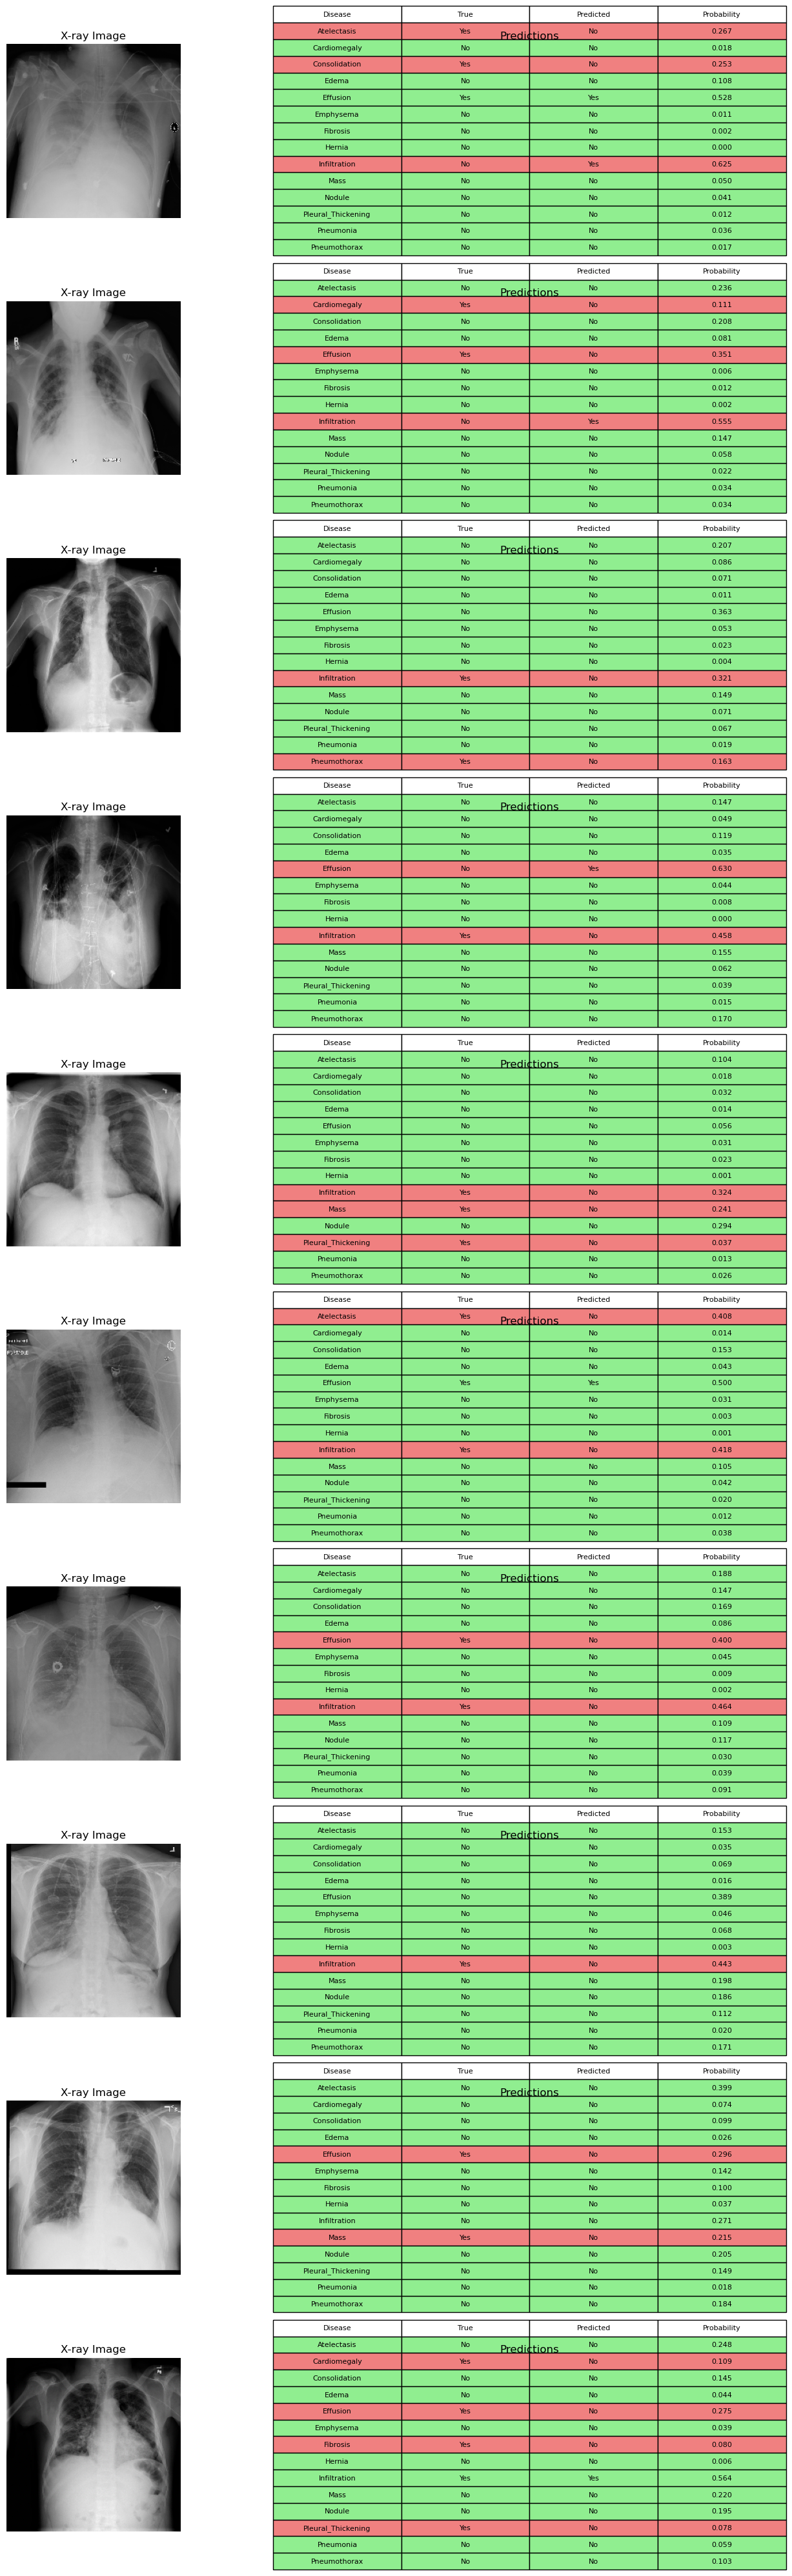

Model saved to chest_xray_classifier.h5


In [5]:
def load_and_preprocess_chest_xray_dataset(csv_path, image_folders, target_size=(224, 224)):
    """
    Load chest X-ray images and their corresponding labels, and preprocess images to uniform dimensions
    
    Args:
        csv_path (str): Path to the CSV file containing image metadata and labels
        image_folders (list): List of folder paths containing the images
        target_size (tuple): Target size for all images (height, width)
    
    Returns:
        tuple: (processed_images, labels, filtered_df)
            - processed_images: Numpy array of preprocessed images with uniform dimensions
            - labels: Dictionary mapping each disease to its binary labels
            - filtered_df: Pandas DataFrame with filtered rows for found images
    """
    import os
    import pandas as pd
    import numpy as np
    from PIL import Image
    import glob
    from tqdm import tqdm
    import cv2
    
    # Read the dataset CSV file
    df = pd.read_csv(csv_path)
    df = df.head(200)
    # List of all possible findings/diseases in the dataset
    diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 
                'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 
                'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
    
    # Create a dictionary to store all available image paths
    available_images = {}
    
    # Find all image files across the specified folders
    print("Scanning image folders...")
    for folder in image_folders:
        if not os.path.exists(folder):
            print(f"Warning: Folder {folder} does not exist")
            continue
            
        image_files = glob.glob(os.path.join(folder, "*.png"))
        for img_path in image_files:
            img_name = os.path.basename(img_path)
            available_images[img_name] = img_path
    
    print(f"Found {len(available_images)} images across all folders")
    
    # Filter the dataframe to include only images that were found
    found_images = df['Image Index'].isin(available_images.keys())
    filtered_df = df[found_images].copy()
    
    print(f"Matched {len(filtered_df)} images with entries in the CSV file")
    
    if len(filtered_df) == 0:
        print("No matching images found. Check image paths and CSV file.")
        return [], {}, filtered_df
    
    # Prepare arrays for processed images and labels
    processed_images = []
    labels = {disease: [] for disease in diseases}
    
    print("Loading and preprocessing images...")
    for idx, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
        img_name = row['Image Index']
        img_path = available_images[img_name]
        
        try:
            # Load image using cv2 for better handling of different image formats
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if img is None:
                # Fallback to PIL if cv2 fails
                pil_img = Image.open(img_path).convert('L')
                img = np.array(pil_img)
            
            # Resize to uniform dimensions
            img_resized = cv2.resize(img, target_size)
            
            # Normalize pixel values to [0, 1]
            img_normalized = img_resized / 255.0
            
            # Add channel dimension if needed
            if len(img_normalized.shape) == 2:
                img_normalized = np.expand_dims(img_normalized, axis=-1)
            
            processed_images.append(img_normalized)
            
            # Extract labels for each disease
            for disease in diseases:
                labels[disease].append(int(row[disease]))
                
        except Exception as e:
            print(f"Error processing image {img_name}: {e}")
            continue
    
    # Convert processed images to numpy array
    processed_images = np.array(processed_images)
    
    # Convert label lists to numpy arrays
    for disease in diseases:
        labels[disease] = np.array(labels[disease])
    
    print(f"Successfully processed {len(processed_images)} images")
    print(f"Processed image shape: {processed_images.shape}")
    
    return processed_images, labels, filtered_df


def run_chest_xray_pipeline(csv_path, image_folders, test_size=0.2, val_size=0.1):
    """
    Run the complete chest X-ray classification pipeline with preprocessing
    
    Args:
        csv_path (str): Path to the CSV file
        image_folders (list): List of image folder paths
        test_size (float): Proportion of data to use for testing
        val_size (float): Proportion of training data to use for validation
        
    Returns:
        ChestXrayClassifier: Trained classifier model
    """
    import numpy as np
    from sklearn.model_selection import train_test_split
    
    # Load and preprocess dataset directly to uniform dimensions
    X, labels, filtered_df = load_and_preprocess_chest_xray_dataset(csv_path, image_folders)
    
    if len(X) == 0:
        print("No images processed. Exiting.")
        return None
    
    # Convert labels to multi-hot array
    y = np.array([labels[disease] for disease in labels]).T  # Shape: [n_samples, n_classes]
    
    # Split data into train, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y.sum(axis=1) > 0
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, 
        test_size=val_size/(1-test_size),
        random_state=42,
        stratify=y_train_val.sum(axis=1) > 0
    )
    
    print(f"Training set: {X_train.shape[0]} images")
    print(f"Validation set: {X_val.shape[0]} images")
    print(f"Test set: {X_test.shape[0]} images")
    
    # Initialize the classifier
    classifier = ChestXrayClassifier(image_size=(224, 224))
    
    # Since images are already preprocessed to the correct size, we need to convert grayscale to RGB
    # for the pretrained model which expects 3 channels
    print("Preparing images for model input...")
    
    def convert_to_rgb(images):
        """Convert grayscale images to RGB by duplicating the channel"""
        if images.shape[-1] == 1:
            return np.repeat(images, 3, axis=-1)
        return images
    
    X_train_rgb = convert_to_rgb(X_train)
    X_val_rgb = convert_to_rgb(X_val)
    X_test_rgb = convert_to_rgb(X_test)
    
    print(f"Input shape for model: {X_train_rgb.shape}")
    
    # Build and train the model
    classifier.build_model()
    classifier.train(X_train_rgb, y_train, X_val_rgb, y_val, epochs=15)
    
    # Fine-tune the model
    classifier.fine_tune(X_train_rgb, y_train, X_val_rgb, y_val, epochs=10)
    
    # Plot training history
    classifier.plot_training_history()
    
    # Evaluate the model
    metrics = classifier.evaluate(X_test_rgb, y_test)
    
    # Print average AUC and average precision
    mean_auc = np.mean(list(metrics['roc_auc'].values()))
    mean_ap = np.mean(list(metrics['avg_precision'].values()))
    print(f"Mean ROC AUC: {mean_auc:.4f}")
    print(f"Mean Average Precision: {mean_ap:.4f}")
    
    # Print classification reports
    classifier.print_classification_reports(X_test_rgb, y_test)
    
    # Plot ROC curves
    classifier.plot_roc_curves(X_test_rgb, y_test)
    
    # Plot precision-recall curves
    classifier.plot_precision_recall_curves(X_test_rgb, y_test)
    
    # Plot confusion matrices for a few diseases
    top_diseases = ['Pneumonia', 'Effusion', 'Atelectasis', 'Nodule', 'Mass']
    classifier.plot_confusion_matrices(X_test_rgb, y_test, top_diseases)
    
    # Visualize predictions
    classifier.visualize_predictions(X_test_rgb, y_test, filtered_df)
    
    # Save the model
    classifier.save_model('chest_xray_classifier.h5')
    
    return classifier


# Example usage
if __name__ == "__main__":
    # Path to the CSV file
    csv_path = "valid_df.csv"  # Update this path
    
    # List of image folders to search
    image_folders = [f"images_{str(i).zfill(3)}/images" for i in range(1, 13)]
    
    # Run the complete pipeline
    classifier = run_chest_xray_pipeline(csv_path, image_folders)

SyntaxError: invalid syntax (957063432.py, line 172)

Scanning image folders...
Found 112120 images across all folders
Matched 5000 images with entries in the CSV file
Loading and preprocessing images...


100%|██████████| 5000/5000 [06:22<00:00, 13.06it/s]


Successfully processed 5000 images
Processed image shape: (5000, 224, 224, 1)
Training set: 3500 images
Validation set: 500 images
Test set: 1000 images
Preparing images for model input...
Input shape for model: (3500, 224, 224, 3)
Training model...
Epoch 1/15
110/110 [==============================] - 599s 5s/step - loss: 0.7959 - accuracy: 0.1260 - auc: 0.6012 - precision: 0.1796 - recall: 0.0952 - val_loss: 0.4569 - val_accuracy: 0.2000 - val_auc: 0.7239 - val_precision: 1.0000 - val_recall: 0.0013 - lr: 1.0000e-04
Epoch 2/15
110/110 [==============================] - 570s 5s/step - loss: 0.5273 - accuracy: 0.1623 - auc: 0.6632 - precision: 0.2908 - recall: 0.0344 - val_loss: 0.4247 - val_accuracy: 0.2080 - val_auc: 0.7465 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/15
110/110 [==============================] - 554s 5s/step - loss: 0.4928 - accuracy: 0.1811 - auc: 0.6863 - precision: 0.3375 - recall: 0.0188 - val_loss: 0.4122 - val_accuracy: 0.2180 

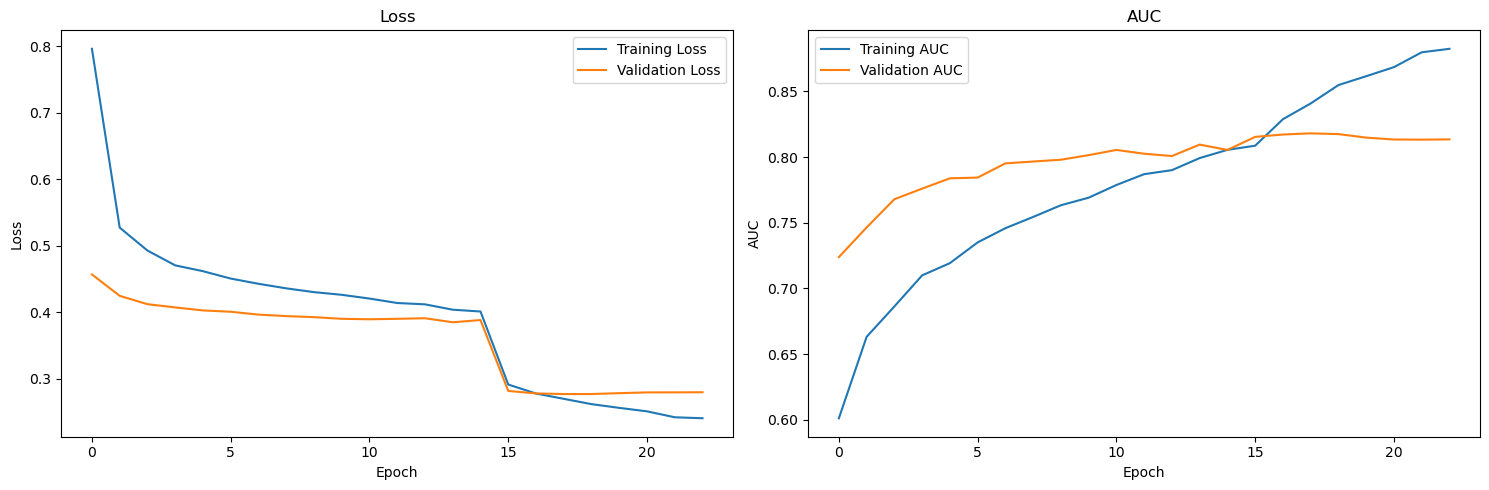

32/32 [==============================] - 35s 867ms/step
Mean ROC AUC: 0.6907
Mean Average Precision: 0.2436
32/32 [==============================] - 25s 789ms/step
Classification Reports for Each Disease:

Atelectasis:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.79      0.96      0.87       768
    Positive       0.54      0.15      0.24       232

    accuracy                           0.77      1000
   macro avg       0.66      0.56      0.55      1000
weighted avg       0.73      0.77      0.72      1000


Cardiomegaly:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.95      1.00      0.98       955
    Positive       0.00      0.00      0.00        45

    accuracy                           0.95      1000
   macro avg       0.48      0.50      0.49      1000
weigh

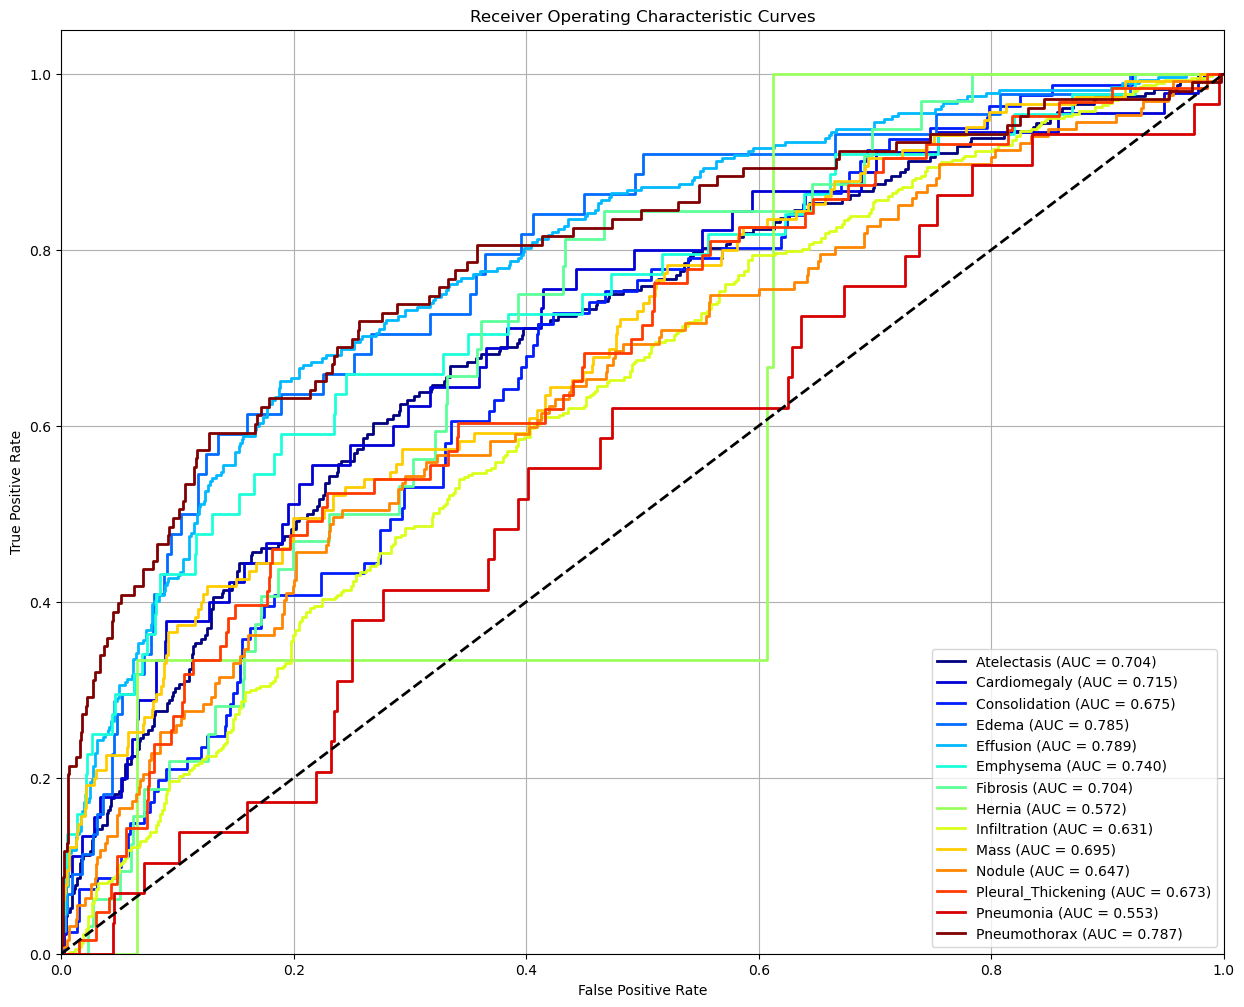

32/32 [==============================] - 24s 740ms/step


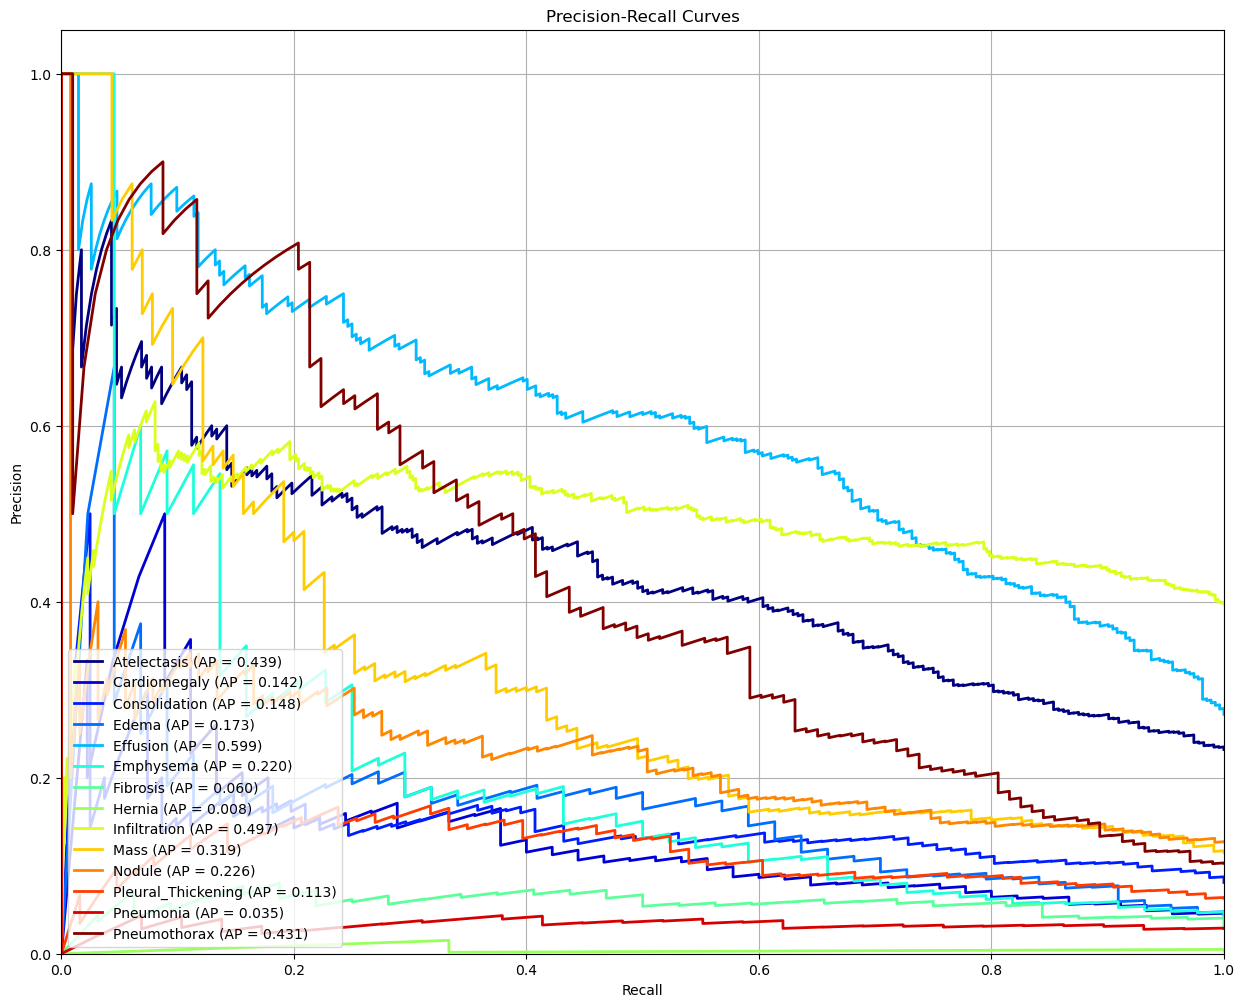

32/32 [==============================] - 23s 708ms/step


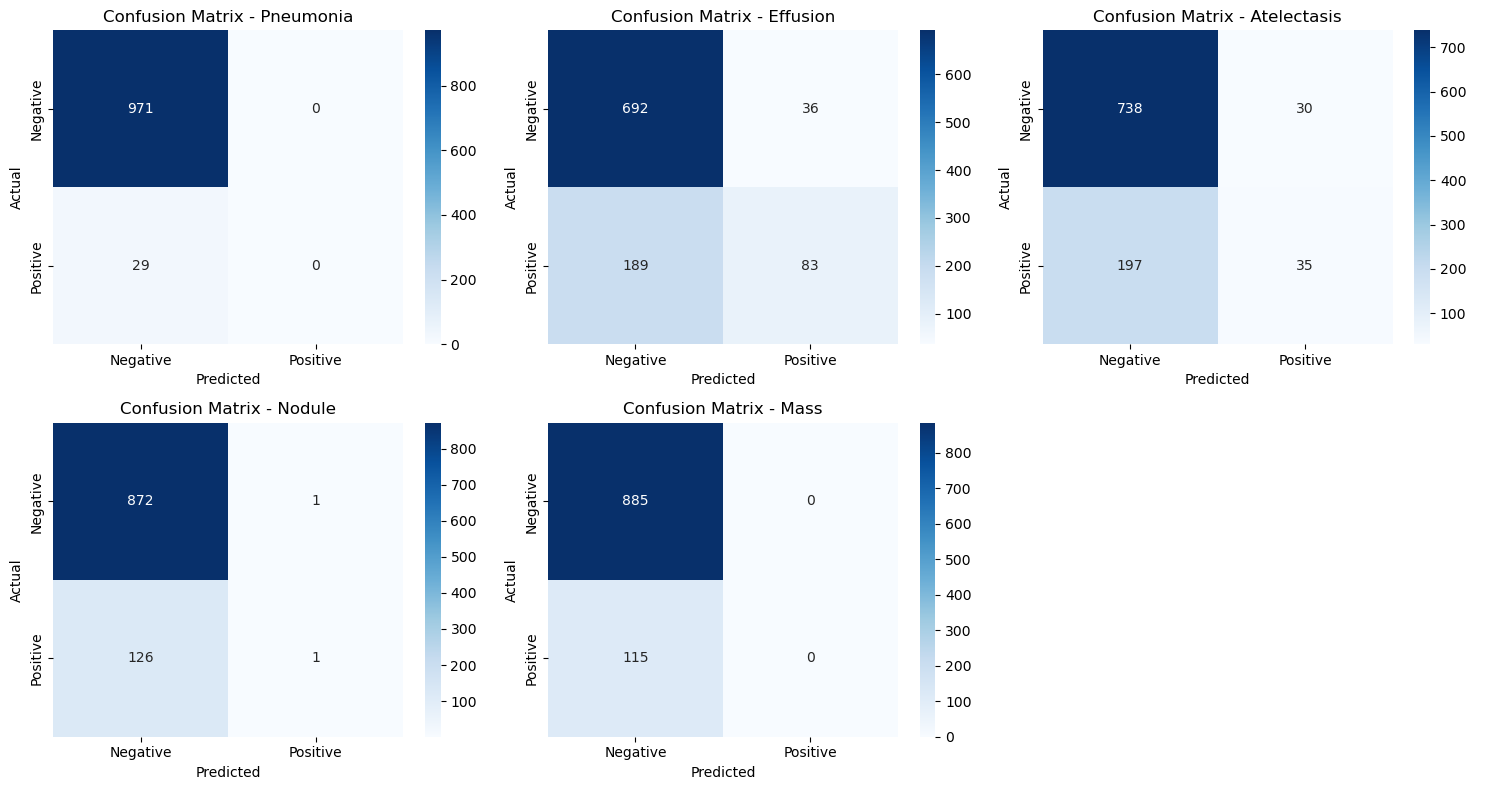

32/32 [==============================] - 22s 683ms/step


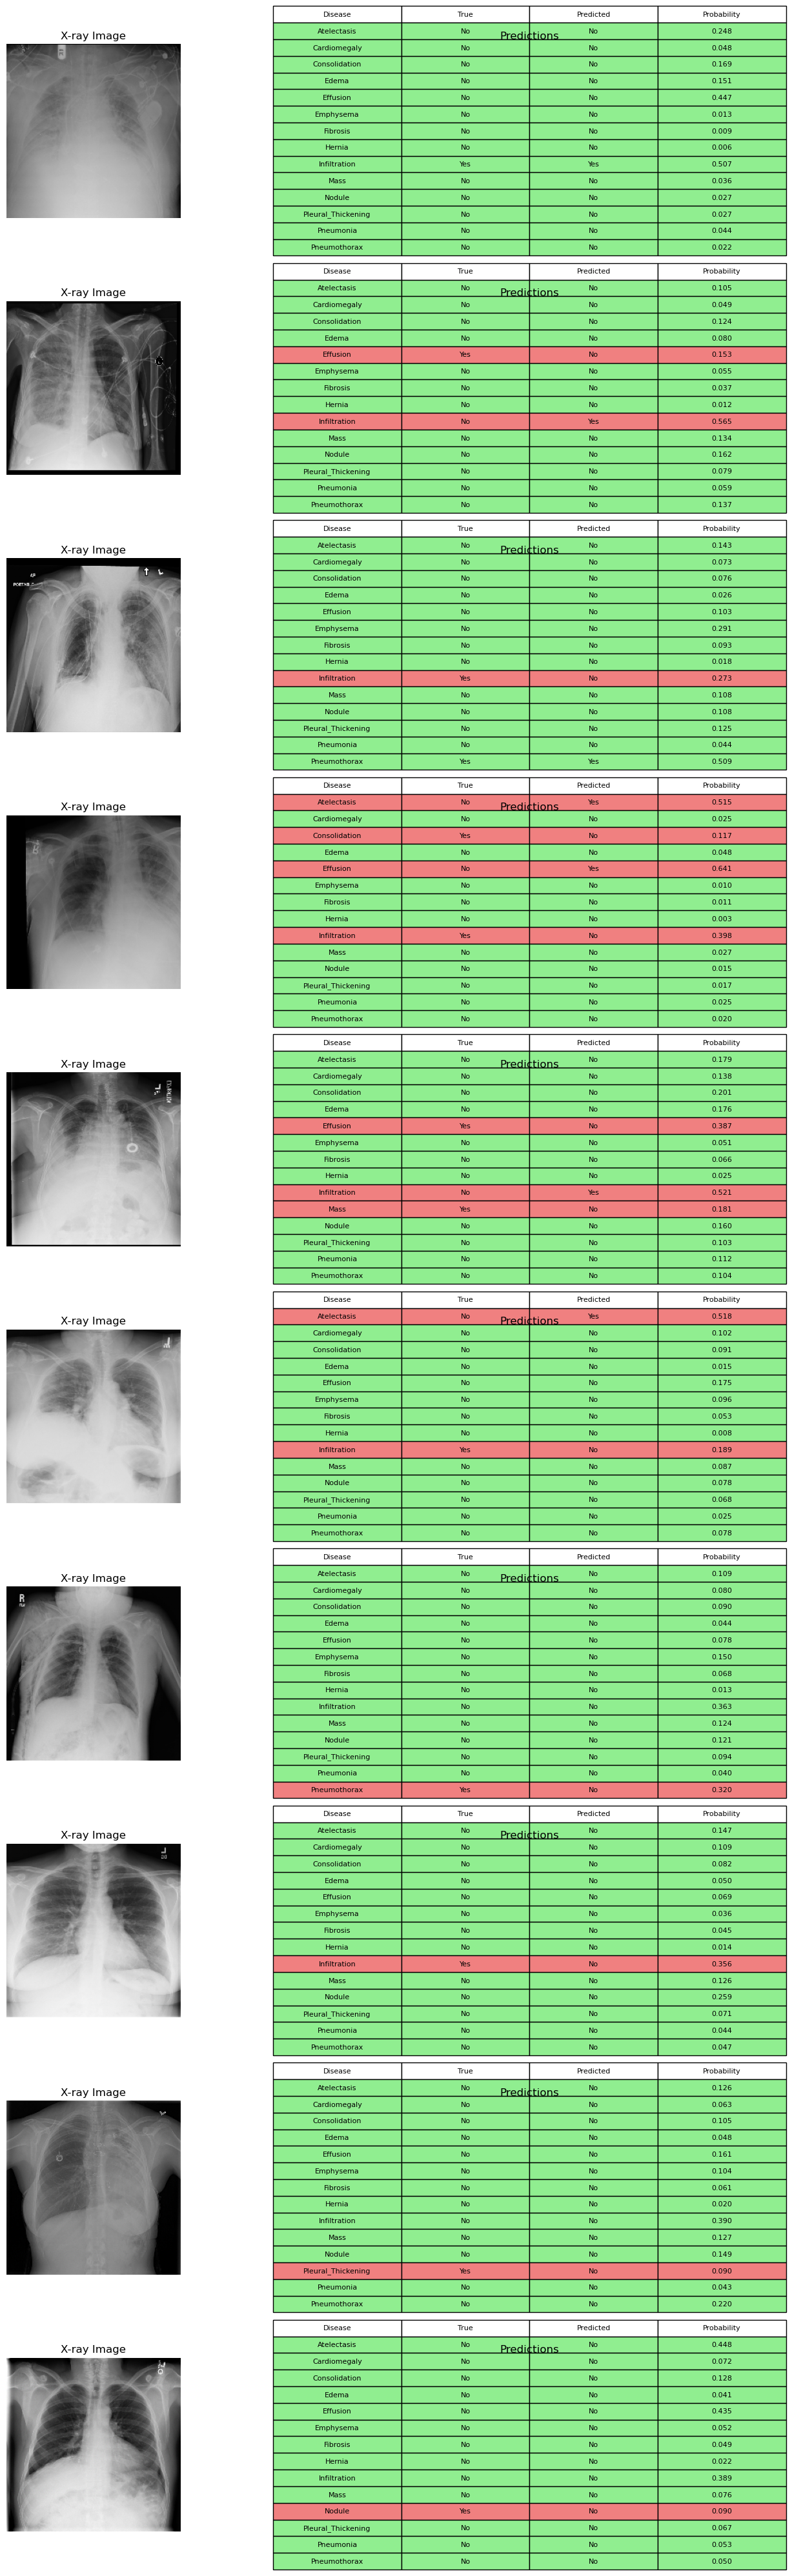

Model saved to chest_xray_classifier.h5


In [18]:
def load_and_preprocess_chest_xray_dataset(csv_path, image_folders, target_size=(224, 224)):
    """
    Load chest X-ray images and their corresponding labels, and preprocess images to uniform dimensions
    
    Args:
        csv_path (str): Path to the CSV file containing image metadata and labels
        image_folders (list): List of folder paths containing the images
        target_size (tuple): Target size for all images (height, width)
    
    Returns:
        tuple: (processed_images, labels, filtered_df)
            - processed_images: Numpy array of preprocessed images with uniform dimensions
            - labels: Dictionary mapping each disease to its binary labels
            - filtered_df: Pandas DataFrame with filtered rows for found images
    """
    import os
    import pandas as pd
    import numpy as np
    from PIL import Image
    import glob
    from tqdm import tqdm
    import cv2
    
    # Read the dataset CSV file
    df = pd.read_csv(csv_path)
    df = df.head(5000)
    # List of all possible findings/diseases in the dataset
    diseases = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 
                'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 
                'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
    
    # Create a dictionary to store all available image paths
    available_images = {}
    
    # Find all image files across the specified folders
    print("Scanning image folders...")
    for folder in image_folders:
        if not os.path.exists(folder):
            print(f"Warning: Folder {folder} does not exist")
            continue
            
        image_files = glob.glob(os.path.join(folder, "*.png"))
        for img_path in image_files:
            img_name = os.path.basename(img_path)
            available_images[img_name] = img_path
    
    print(f"Found {len(available_images)} images across all folders")
    
    # Filter the dataframe to include only images that were found
    found_images = df['Image Index'].isin(available_images.keys())
    filtered_df = df[found_images].copy()
    
    print(f"Matched {len(filtered_df)} images with entries in the CSV file")
    
    if len(filtered_df) == 0:
        print("No matching images found. Check image paths and CSV file.")
        return [], {}, filtered_df
    
    # Prepare arrays for processed images and labels
    processed_images = []
    labels = {disease: [] for disease in diseases}
    
    print("Loading and preprocessing images...")
    for idx, row in tqdm(filtered_df.iterrows(), total=len(filtered_df)):
        img_name = row['Image Index']
        img_path = available_images[img_name]
        
        try:
            # Load image using cv2 for better handling of different image formats
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if img is None:
                # Fallback to PIL if cv2 fails
                pil_img = Image.open(img_path).convert('L')
                img = np.array(pil_img)
            
            # Resize to uniform dimensions
            img_resized = cv2.resize(img, target_size)
            
            # Normalize pixel values to [0, 1]
            img_normalized = img_resized / 255.0
            
            # Add channel dimension if needed
            if len(img_normalized.shape) == 2:
                img_normalized = np.expand_dims(img_normalized, axis=-1)
            
            processed_images.append(img_normalized)
            
            # Extract labels for each disease
            for disease in diseases:
                labels[disease].append(int(row[disease]))
                
        except Exception as e:
            print(f"Error processing image {img_name}: {e}")
            continue
    
    # Convert processed images to numpy array
    processed_images = np.array(processed_images)
    
    # Convert label lists to numpy arrays
    for disease in diseases:
        labels[disease] = np.array(labels[disease])
    
    print(f"Successfully processed {len(processed_images)} images")
    print(f"Processed image shape: {processed_images.shape}")
    
    return processed_images, labels, filtered_df


def run_chest_xray_pipeline(csv_path, image_folders, test_size=0.2, val_size=0.1):
    """
    Run the complete chest X-ray classification pipeline with preprocessing
    
    Args:
        csv_path (str): Path to the CSV file
        image_folders (list): List of image folder paths
        test_size (float): Proportion of data to use for testing
        val_size (float): Proportion of training data to use for validation
        
    Returns:
        ChestXrayClassifier: Trained classifier model
    """
    import numpy as np
    from sklearn.model_selection import train_test_split
    
    # Load and preprocess dataset directly to uniform dimensions
    X, labels, filtered_df = load_and_preprocess_chest_xray_dataset(csv_path, image_folders)
    
    if len(X) == 0:
        print("No images processed. Exiting.")
        return None
    
    # Convert labels to multi-hot array
    y = np.array([labels[disease] for disease in labels]).T  # Shape: [n_samples, n_classes]
    
    # Split data into train, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y.sum(axis=1) > 0
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, 
        test_size=val_size/(1-test_size),
        random_state=42,
        stratify=y_train_val.sum(axis=1) > 0
    )
    
    print(f"Training set: {X_train.shape[0]} images")
    print(f"Validation set: {X_val.shape[0]} images")
    print(f"Test set: {X_test.shape[0]} images")
    
    # Initialize the classifier
    classifier = ChestXrayClassifier(image_size=(224, 224))
    
    # Since images are already preprocessed to the correct size, we need to convert grayscale to RGB
    # for the pretrained model which expects 3 channels
    print("Preparing images for model input...")
    
    def convert_to_rgb(images):
        """Convert grayscale images to RGB by duplicating the channel"""
        if images.shape[-1] == 1:
            return np.repeat(images, 3, axis=-1)
        return images
    
    X_train_rgb = convert_to_rgb(X_train)
    X_val_rgb = convert_to_rgb(X_val)
    X_test_rgb = convert_to_rgb(X_test)
    
    print(f"Input shape for model: {X_train_rgb.shape}")
    
    # Build and train the model
    classifier.build_model()
    classifier.train(X_train_rgb, y_train, X_val_rgb, y_val, epochs=15)
    
    # Fine-tune the model
    classifier.fine_tune(X_train_rgb, y_train, X_val_rgb, y_val, epochs=10)
    
    # Plot training history
    classifier.plot_training_history()
    
    # Evaluate the model
    metrics = classifier.evaluate(X_test_rgb, y_test)
    
    # Print average AUC and average precision
    mean_auc = np.mean(list(metrics['roc_auc'].values()))
    mean_ap = np.mean(list(metrics['avg_precision'].values()))
    print(f"Mean ROC AUC: {mean_auc:.4f}")
    print(f"Mean Average Precision: {mean_ap:.4f}")
    
    # Print classification reports
    classifier.print_classification_reports(X_test_rgb, y_test)
    
    # Plot ROC curves
    classifier.plot_roc_curves(X_test_rgb, y_test)
    
    # Plot precision-recall curves
    classifier.plot_precision_recall_curves(X_test_rgb, y_test)
    
    # Plot confusion matrices for a few diseases
    top_diseases = ['Pneumonia', 'Effusion', 'Atelectasis', 'Nodule', 'Mass']
    classifier.plot_confusion_matrices(X_test_rgb, y_test, top_diseases)
    
    # Visualize predictions
    classifier.visualize_predictions(X_test_rgb, y_test, filtered_df)
    
    # Save the model
    classifier.save_model('chest_xray_classifier.h5')
    
    return classifier


# Example usage
if __name__ == "__main__":
    # Path to the CSV file
    csv_path = "train_df.csv"  # Update this path
    
    # List of image folders to search
    image_folders = [f"images_{str(i).zfill(3)}/images" for i in range(1, 13)]
    
    # Run the complete pipeline
    classifier = run_chest_xray_pipeline(csv_path, image_folders)